In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Context

In [2]:
df=pd.read_csv(r'C:\Users\srikr\Documents\GitHub\Second Hand Car Price Prediction\used_cars.csv')

This dataset contains the selling prices of used cars along with detailed information about the characteristics of the vehicle, such as model, year, mileage, engine, among others.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
df.head()

brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  
0  At least 1 accident or damage reported         Yes  $10,300  
1  At least 1 accident or damage reported         Yes  $38,005  
2                           None reported         NaN  $54,598  
3                           None reported         Yes  $15,500  
4                           None reported         NaN  $34,999

## Cleaning and Feature Engineering

Before doing the analysis, we can see that there are various columns with valuable information waiting to be discovered.

- There are a lot of brands in the data. The ones that have more frequency are Ford, followed by BMW and Mercedez-Benz.

- The brands are extensively distributed in different values, so for this analysis (and later modeling) we can simplify this categorical feature in smaller values. What we can do is find the country and continent of origin and use it for analyzing the impact that it could have on the price.

In [5]:
# df['brand'].value_counts()[:10]
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  

- I used webscraping to obtain the country of origin of the brand, and filled manually the missing brands.

In [6]:
dict_brands = pd.read_csv(r'C:\Users\srikr\Documents\GitHub\Second Hand Car Price Prediction\brand_by_country.csv')
dict_brands = dict(zip(dict_brands['brand'].str.lower(), dict_brands['country']))
dict_brands['land'] = 'United Kingdom'
dict_brands['aston'] = 'United Kingdom'
dict_brands['hummer'] = 'United States'
dict_brands['volvo'] = 'Sweden'
dict_brands['alfa'] = 'Italy'
dict_brands['scion'] = 'Japan'
dict_brands['mitsubishi'] = 'Japan'
dict_brands['saturn'] = 'United States'
dict_brands['pontiac'] = 'United States'
dict_brands['plymouth'] = 'United States'
dict_brands['mercury'] = 'United States'
dict_brands['maybach'] = 'Germany'
dict_brands['saab'] = 'Sweden'

In [7]:
df['brand_country'] = df['brand'].str.lower().replace(dict_brands)

In [8]:
df['brand_country'].value_counts()

brand_country
USA               1419
Germany           1184
Japan              759
South Korea        168
United Kingdom     139
UK                 101
Italy               96
Hong Kong           59
Sweden              41
United States       40
France               1
Switzerland          1
japan                1
Name: count, dtype: int64

In [9]:
df.brand_country.replace({'UK':'United Kingdom','USA':'United States','japan':'Japan'},inplace=True)

In [10]:
df.brand_country.value_counts()

brand_country
United States     1459
Germany           1184
Japan              760
United Kingdom     240
South Korea        168
Italy               96
Hong Kong           59
Sweden              41
France               1
Switzerland          1
Name: count, dtype: int64

- Also, I added the continent according to each country of origin.

In [11]:
europe = ['Germany', 'Italy', 'Sweden', 'United Kingdom', 'Slovakia','Switzerland']
asia = ['Japan', 'South Korea', 'Hong Kong']
us = ['United States']

df.loc[df['brand_country'].isin(europe), 'brand_continent'] = 'Europe'
df.loc[df['brand_country'].isin(asia), 'brand_continent'] = 'Asia'
df.loc[df['brand_country'].isin(us), 'brand_continent'] = 'American'

- We can see that the milage is not in numeric format, so with a few lines of code we can obtain the values in the correct format.

In [12]:
df['milage'].str.split(" ", expand = True).head()

0    1
0  51,000  mi.
1  34,742  mi.
2  22,372  mi.
3  88,900  mi.
4   9,835  mi.

In [13]:
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(int)

- The majority of cars use gasoline as fuel, representing 86% of the vehicles in this data.

- For this feature we also do some cleaning for some fuel types.

In [14]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [15]:
df['fuel'] = df['fuel_type'].fillna('Electric')
df.loc[df['fuel'].str.contains('Hybrid'), 'fuel'] = 'Hybrid'
df.loc[df['fuel'].str.contains('–'), 'fuel'] = 'Other'
df.loc[df['fuel'] == 'not supported', 'fuel'] = 'Other'

- As we can see, the engine feature has a lot more useful information in its value. We identify three parameters that we can obtain from this variable: horsepower, liters and cylinders of the engine.

- This is useful information that could help us understand better the relation between the engine and the price.

In [16]:
df['engine'].str.split(' ',expand = True)

0      1     2         3       4             5       6  \
0      300.0HP   3.7L    V6  Cylinder  Engine          Flex    Fuel   
1         3.8L     V6   24V       GDI    DOHC          None    None   
2          3.5  Liter  DOHC      None    None          None    None   
3      354.0HP   3.5L    V6  Cylinder  Engine  Gas/Electric  Hybrid   
4         2.0L     I4   16V       GDI    DOHC         Turbo    None   
...        ...    ...   ...       ...     ...           ...     ...   
4004      6.0L    W12   48V       PDI    DOHC          Twin   Turbo   
4005   349.0HP   3.0L    V6  Cylinder  Engine      Gasoline    Fuel   
4006  Electric   None  None      None    None          None    None   
4007   450.0HP   3.5L    V6  Cylinder  Engine      Gasoline    Fuel   
4008   248.0HP   2.0L     4  Cylinder  Engine      Gasoline    Fuel   

               7     8     9  
0     Capability  None  None  
1           None  None  None  
2           None  None  None  
3           None  None  None  
4           None  None  None  
...          ...   ...   ...  
4004        None  None  None  
4005        None  None  None  
4006        None  None  None  
4007        None  None  None  
4008        None  None  None  

[4009 rows x 10 columns]

- In this cell we obtain each parameter that we mentioned previously. Basically, we use word association and separate the corresponding values from the string that is attached.


In [17]:
split_engine = df['engine'].str.split(' ',expand = True)

split_engine.loc[split_engine[0].str.contains('HP'), 'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'), 0].str.replace('HP', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 'cylinders'] = split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 2].str.replace('V', "").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinders'] = 6

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull())][2].str.replace('L', '')

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)

- As we can see, we have more specifications of the engine features.

In [18]:
df[['engine', 'horsepower', 'litres', 'cylinders']].head()

engine  horsepower litres  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...       300.0    3.7   
1                               3.8L V6 24V GDI DOHC         NaN    3.8   
2                                     3.5 Liter DOHC         NaN    3.5   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...       354.0    3.5   
4                         2.0L I4 16V GDI DOHC Turbo         NaN    2.0   

   cylinders  
0        6.0  
1        6.0  
2        NaN  
3        6.0  
4        4.0

- We can see that there a lot of NaNs, especially in horsepower, which is not ideal if we are going to use it for modeling. We will take care of this later in the notebook.

In [19]:
df[['engine', 'horsepower', 'litres', 'cylinders']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   engine      4009 non-null   object 
 1   horsepower  3199 non-null   float64
 2   litres      3790 non-null   object 
 3   cylinders   3623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 125.4+ KB


- For the transmission feature, we can define it in 4 categories.

In [20]:
df.loc[df['transmission'].str.contains('automatic|Automatic|A/T|AT|Auto|CVT'), 'tsm'] = 'Automatic'
df.loc[df['transmission'].str.contains('M/T|Manual|Mt'), 'tsm'] = 'Manual'
df.loc[df['transmission'].str.contains('Dual Shift Mode'), 'tsm'] = 'DCT'
df['tsm'].fillna('Other', inplace = True)

In [21]:
df.head()

brand                            model  model_year  milage  \
0      Ford  Utility Police Interceptor Base        2013   51000   
1   Hyundai                     Palisade SEL        2021   34742   
2     Lexus                    RX 350 RX 350        2022   22372   
3  INFINITI                 Q50 Hybrid Sport        2015   88900   
4      Audi        Q3 45 S line Premium Plus        2021    9835   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  brand_country  \
0  At least 1 accident or damage reported         Yes  $10,300  United States   
1  At least 1 accident or damage reported         Yes  $38,005    South Korea   
2                           None reported         NaN  $54,598          Japan   
3                           None reported         Yes  $15,500      Hong Kong   
4                           None reported         NaN  $34,999        Germany   

  brand_continent           fuel  horsepower litres  cylinders        tsm  
0        American  E85 Flex Fuel       300.0    3.7        6.0  Automatic  
1            Asia       Gasoline         NaN    3.8        6.0  Automatic  
2            Asia       Gasoline         NaN    3.5        NaN  Automatic  
3            Asia         Hybrid       354.0    3.5        6.0  Automatic  
4          Europe       Gasoline         NaN    2.0        4.0  Automatic

- There are a lot of different color values, for the exterior and interior of the vehicle.

In [22]:
df['ext_col'].value_counts().head()

ext_col
Black     905
White     816
Gray      496
Silver    374
Blue      349
Name: count, dtype: int64

In [23]:
df['int_col'].value_counts().head()

int_col
Black    2025
Beige     538
Gray      472
Brown     157
–         133
Name: count, dtype: int64

- For a more simplified analysis, we can narrow the color values to Black, White and Other.

In [24]:
df.loc[df['ext_col'].str.contains('Black'), 'exterior_color'] = 'Black'
df.loc[df['ext_col'].str.contains('White'), 'exterior_color'] = 'White'
df['exterior_color'].fillna('Other', inplace = True)

In [25]:
df.loc[df['int_col'].str.contains('Black'), 'interior_color'] = 'Black'
df.loc[df['int_col'].str.contains('White'), 'interior_color'] = 'White'
df['interior_color'].fillna('Other', inplace = True)

- For the occurrence of accidents and clean title, we create a binary feature.

In [26]:
df['accident'] = df['accident'].replace('At least 1 accident or damage reported',1)
df.loc[df['accident'] != 1, 'accident'] = 0
df['accident'] = df['accident'].astype(int)

df['clean_title'] = df['clean_title'].replace('Yes', 1).fillna(0)


- The price is in string format, so we pass it as an int.

In [27]:
df['price'] = df['price'].str.replace('$', "").str.replace(',', "").astype(int)

## EDA

- Firstly, we create a copy of the dataset we modified until now in case we need it further in the code.

In [28]:
df_ori = df.copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            4009 non-null   object 
 1   model            4009 non-null   object 
 2   model_year       4009 non-null   int64  
 3   milage           4009 non-null   int32  
 4   fuel_type        3839 non-null   object 
 5   engine           4009 non-null   object 
 6   transmission     4009 non-null   object 
 7   ext_col          4009 non-null   object 
 8   int_col          4009 non-null   object 
 9   accident         4009 non-null   int32  
 10  clean_title      4009 non-null   float64
 11  price            4009 non-null   int32  
 12  brand_country    4009 non-null   object 
 13  brand_continent  4008 non-null   object 
 14  fuel             4009 non-null   object 
 15  horsepower       3199 non-null   float64
 16  litres           3790 non-null   object 
 17  cylinders     

In [30]:
max_year = df['model_year'].max()

# Calculate the age of each car by subtracting model_year from max_year
df['car_age'] = max_year - df['model_year']
df.drop(columns=['model_year'], inplace=True)
# Print the DataFrame with car ages
df.head()

brand                            model  milage      fuel_type  \
0      Ford  Utility Police Interceptor Base   51000  E85 Flex Fuel   
1   Hyundai                     Palisade SEL   34742       Gasoline   
2     Lexus                    RX 350 RX 350   22372       Gasoline   
3  INFINITI                 Q50 Hybrid Sport   88900         Hybrid   
4      Audi        Q3 45 S line Premium Plus    9835       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
2                                     3.5 Liter DOHC          Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
4                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   

                  ext_col int_col  accident  clean_title  ...  brand_country  \
0                   Black   Black         1          1.0  ...  United States   
1         Moonlight Cloud    Gray         1          1.0  ...    South Korea   
2                    Blue   Black         0          0.0  ...          Japan   
3                   Black   Black         0          1.0  ...      Hong Kong   
4  Glacier White Metallic   Black         0          0.0  ...        Germany   

  brand_continent           fuel horsepower  litres cylinders        tsm  \
0        American  E85 Flex Fuel      300.0     3.7       6.0  Automatic   
1            Asia       Gasoline        NaN     3.8       6.0  Automatic   
2            Asia       Gasoline        NaN     3.5       NaN  Automatic   
3            Asia         Hybrid      354.0     3.5       6.0  Automatic   
4          Europe       Gasoline        NaN     2.0       4.0  Automatic   

  exterior_color interior_color car_age  
0          Black          Black      11  
1          Other          Other       3  
2          Other          Black       2  
3          Black          Black       9  
4          White          Black       3  

[5 rows x 21 columns]

- At first glance, we can see that there are very high prices that are possibly outliers. Among these high prices, we can find the Quattroporte Base from the Maserati brand, with a price of nearly 3 million dollars!. It is likely that these cases affect our model and make noise instead of a good generalization.

- If we reduce our dataset to prices up to 200000 dollars, we have a better sample of vehicles with a distribution very similar to a normal one. Doing this reduction, we still have 98% of our original data. Great!


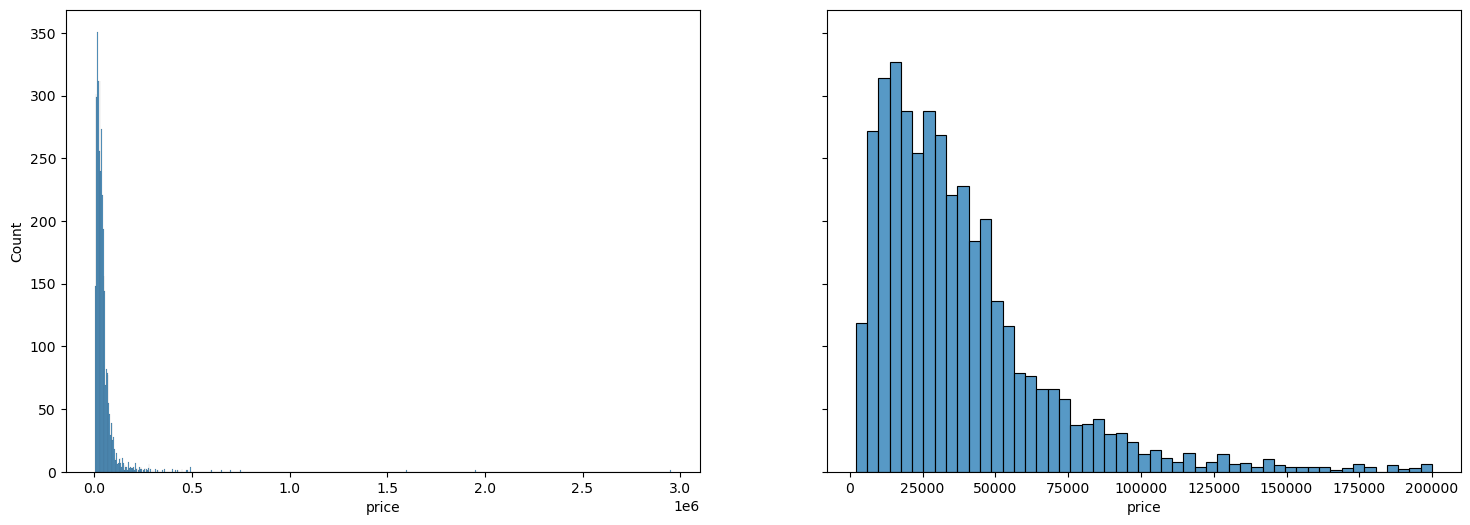

In [31]:
fig, axes = plt.subplots(1,2, figsize = (18,6), sharey = True)

#axes[0].set_ylabel('asdjas')
sns.histplot(data = df['price'], ax = axes[0])
sns.histplot(data = df[df['price']<=200000]['price'], ax = axes[1])

plt.show()

In [32]:
df.sort_values(['price'], ascending = False).head(2)

brand                    model  milage fuel_type  \
693  Maserati        Quattroporte Base   32000  Gasoline   
229   Bugatti  Veyron 16.4 Grand Sport    6330  Gasoline   

                                           engine  \
693  394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
229              8.0L W16 64V GDI DOHC Twin Turbo   

                          transmission ext_col int_col  accident  clean_title  \
693     Transmission w/Dual Shift Mode     Red   Beige         1          1.0   
229  7-Speed Automatic with Auto-Shift   White   White         0          1.0   

     ...  brand_country brand_continent      fuel horsepower  litres  \
693  ...          Italy          Europe  Gasoline      394.0     4.2   
229  ...         France             NaN  Gasoline        NaN     8.0   

    cylinders        tsm exterior_color interior_color car_age  
693       8.0        DCT          Other          Other      19  
229      16.0  Automatic          White          White      13  

[2 rows x 21 columns]

- The mean price is 37884 dollars, with 75% of the data not surpassing 48000. The median has a value of 30500, which correlates to the graph seen previously.

In [33]:
df[df['price']<=200000]['price'].describe()

count      3934.000000
mean      37884.626080
std       29948.902974
min        2000.000000
25%       17000.000000
50%       30500.000000
75%       48000.000000
max      200000.000000
Name: price, dtype: float64

In [34]:
df[df['price']<=200000]['price'].median()

30500.0

- We filter our dataset as we mentioned earlier.

In [35]:
df = df[df['price']<=200000].copy().reset_index(drop = True)

- As seen in the histogram below, a great proportion of cars are relatively new models, the average being the 9 year.

- If we contrast the year of the model with the price, we can see that a positive correlation exist between these two features. In general, the higher the year of the model, the higher the price will be.

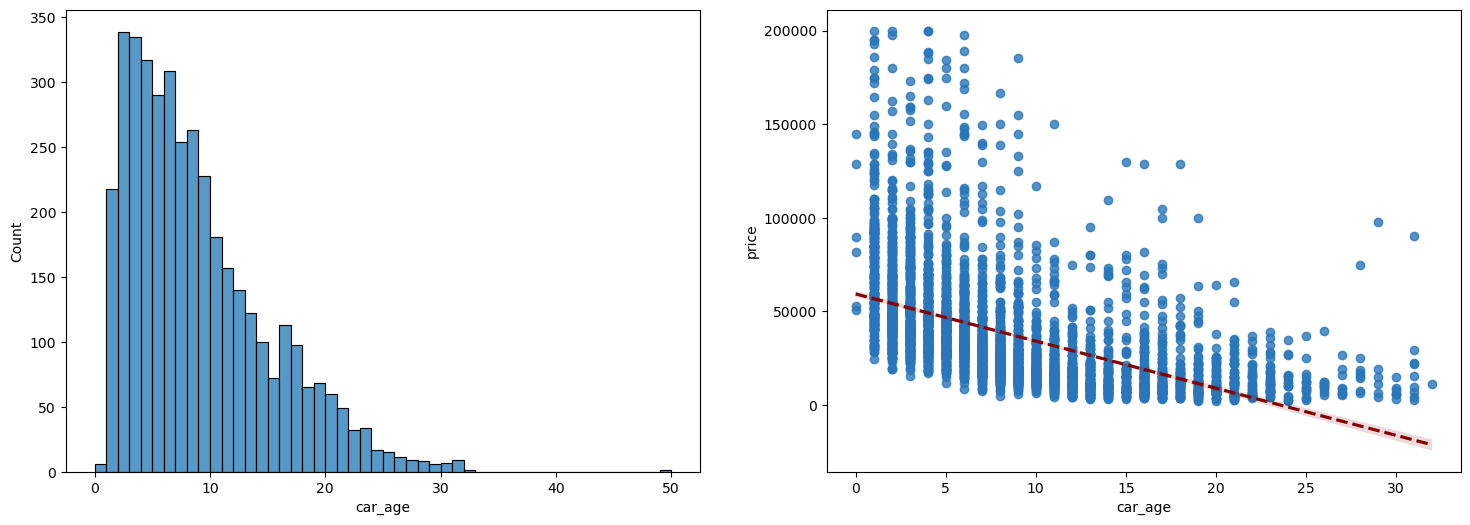

In [36]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['car_age'], ax = axes[0])
sns.regplot(data = df[(df['car_age'] <= 34)], x = 'car_age', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])

plt.show()

- For the milage, we can see that 75% of cars have a value less than 94100 mi. High milage cars are less frequent, probably because these vehicles are ineligible for sale.

- As we can expect, we can see that a higher milage means a lower price. Naturally, a car that has a lot of milage probably does not have good efficiency or it is in the best condition, so the price must be lower to be more attractive for sale.

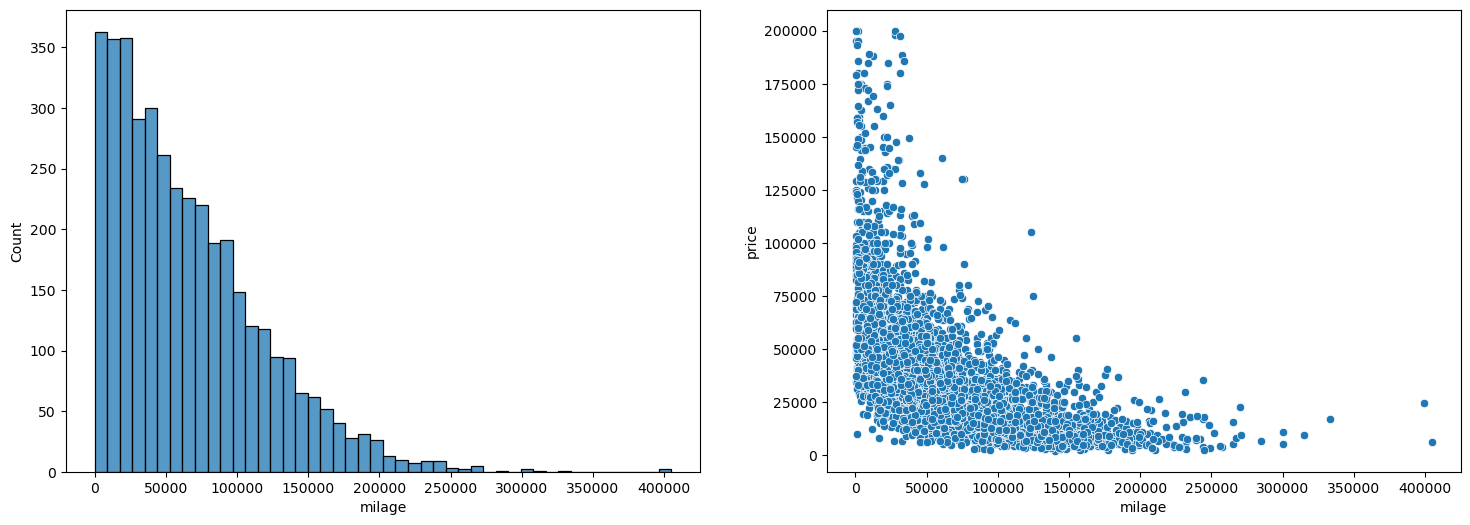

In [37]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['milage'], ax = axes[0])
sns.scatterplot(data = df, x = 'milage', y = 'price', ax = axes[1])

plt.show()

- The majority of cars are gasoline-fueled. There are few cars that are hybrid or even electric.

- We can see that the gasoline-fueled cars are cheaper than other types of cars, such as diesel-fueled ones. However, this feature has a lot of outliers and the other categories have less values than the gasoline one, which may not be representative.

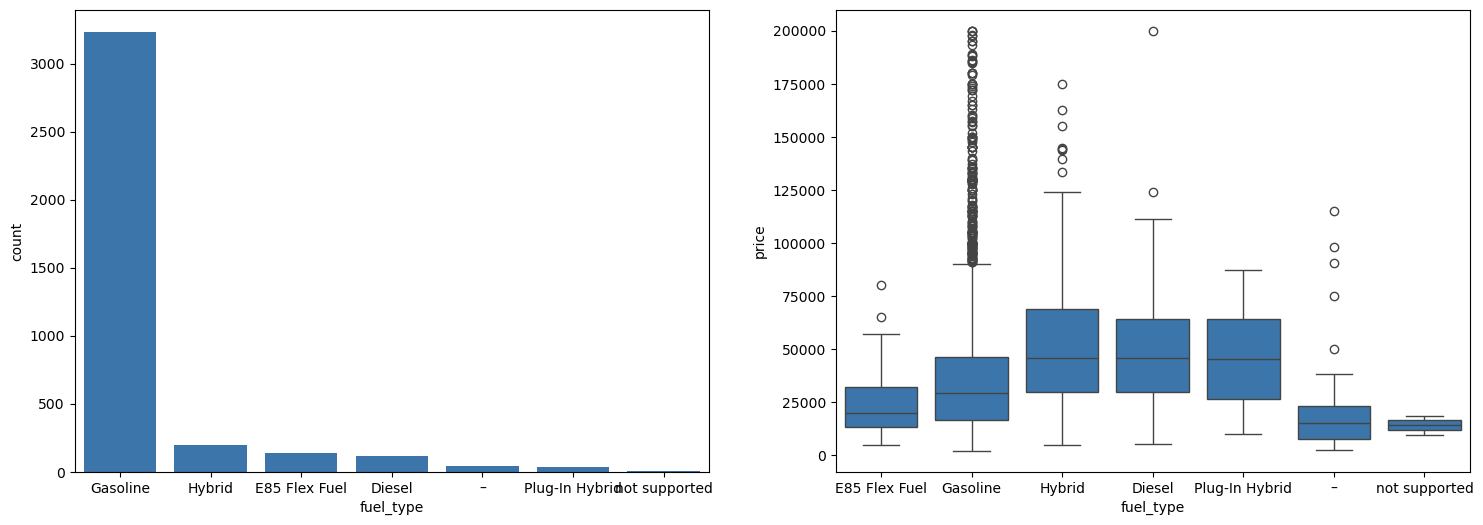

In [38]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.barplot(data = df['fuel_type'].value_counts().reset_index(), x = 'fuel_type', y = 'count', color = sns.xkcd_rgb['bluish'], ax = axes[0])
sns.boxplot(data = df, x = 'fuel_type', y = 'price', color = sns.xkcd_rgb['bluish'], ax = axes[1])

plt.show()

In [39]:
df['litres'] = df['litres'].astype(float)

- From all the engine features, we see that horsepower holds the best correlation with the price, which we can see is positive. The other features don't give us much insight in relation to price.

- Given that horsepower is an important feature, we'll need to find a way of filling the NaNs that are present in this column (around 20% are blank values).

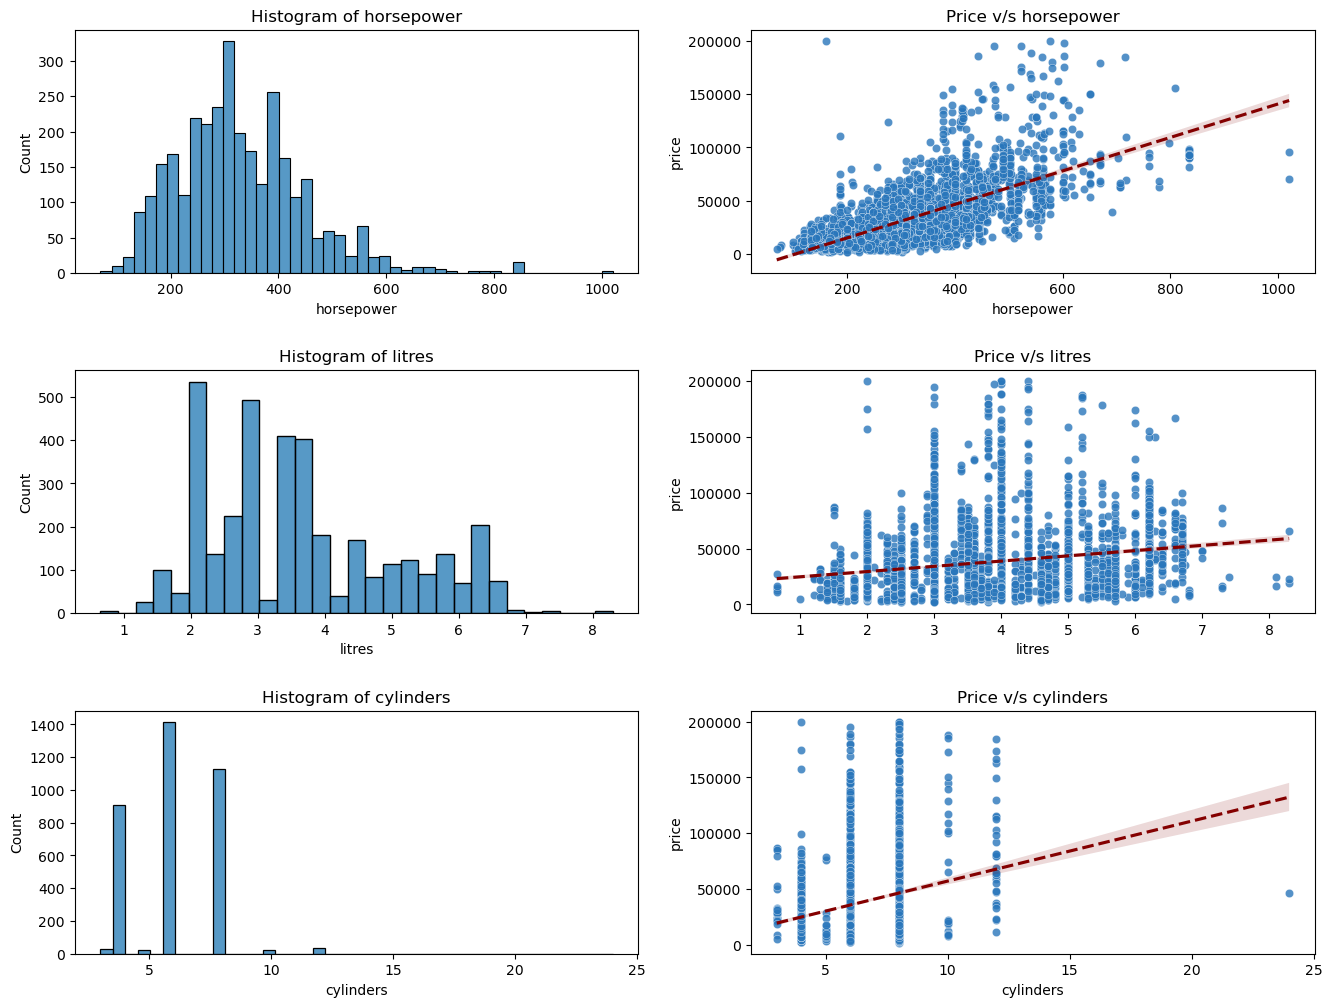

In [40]:
fig, axes = plt.subplots(3,2, figsize = (16,12))

engine_vars = ['horsepower', 'litres', 'cylinders']

plt.subplots_adjust(hspace = 0.4)

for e, variable in enumerate(engine_vars):

    sns.histplot(data = df[variable], ax = axes[e][0])
    sns.regplot(data = df, x = variable, y = 'price',
                scatter_kws = {'color': sns.xkcd_rgb['bluish'], 'linewidths': 0.3, 'edgecolor': 'white'},
                line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[e][1])

    axes[e][0].set_title('Histogram of ' + str(variable))
    axes[e][1].set_title('Price v/s ' + str(variable))


plt.show()

- We also see that the car transmission does not have a meaningful impact on price.

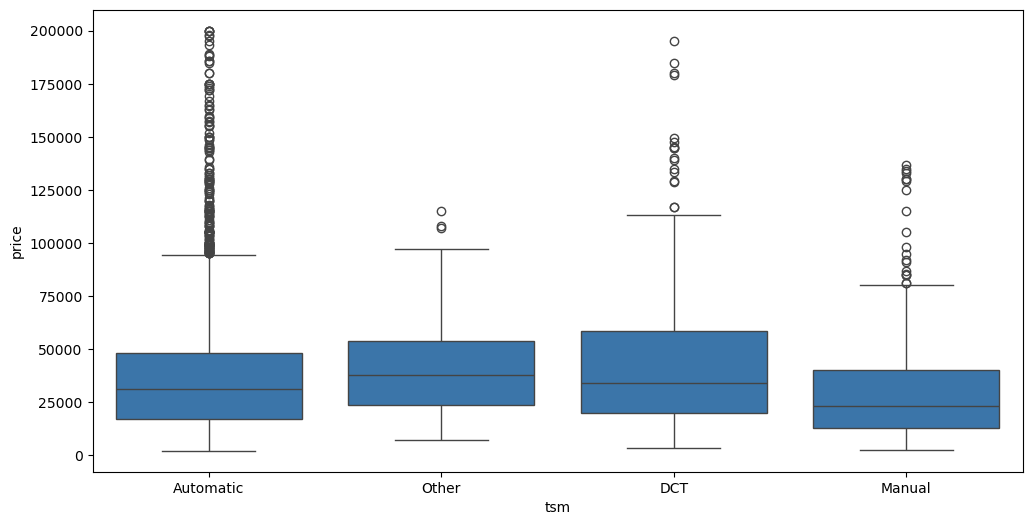

In [41]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'tsm', y = 'price', color = sns.xkcd_rgb['bluish'])

plt.show()

- The color of the car seems to do not affect the price, although for cars with a white interior there is a higher price.

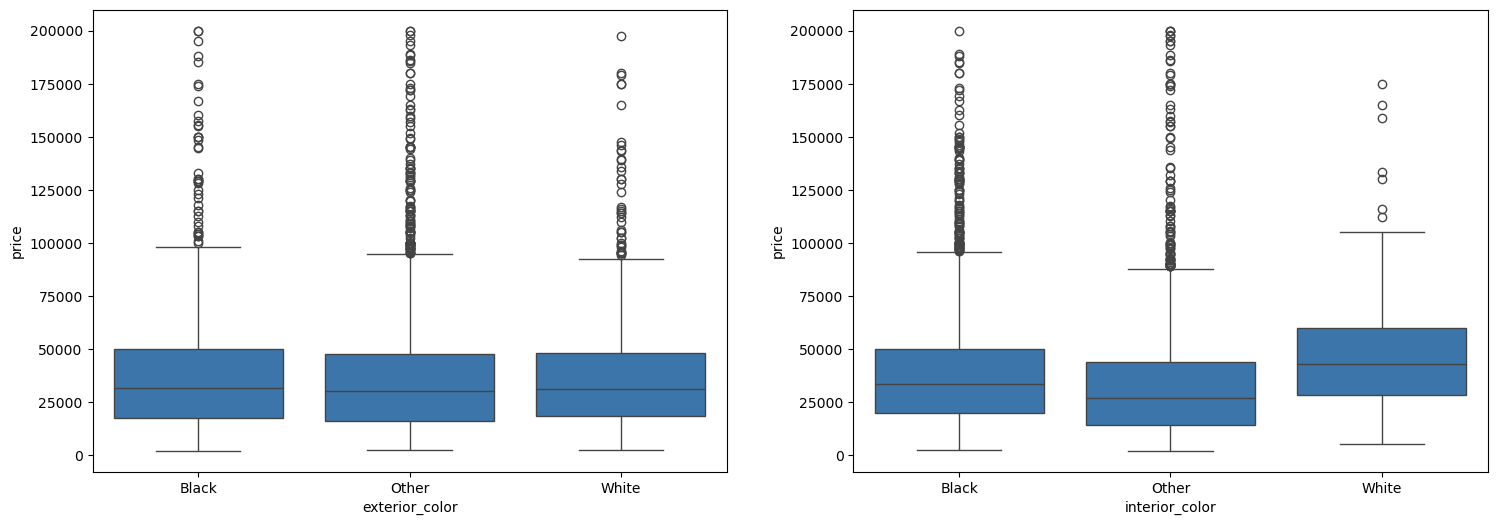

In [42]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.boxplot(data = df, x = 'exterior_color', y = 'price', color = sns.xkcd_rgb['bluish'], ax = axes[0])
sns.boxplot(data = df, x = 'interior_color', y = 'price', color = sns.xkcd_rgb['bluish'], ax = axes[1])


plt.show()

- If the car suffers an accident, the price will generally be less than vehicles that didn't have an accident. If we don't show the outliers, we can see this behavior. Probably these outliers can be explained by other variables.

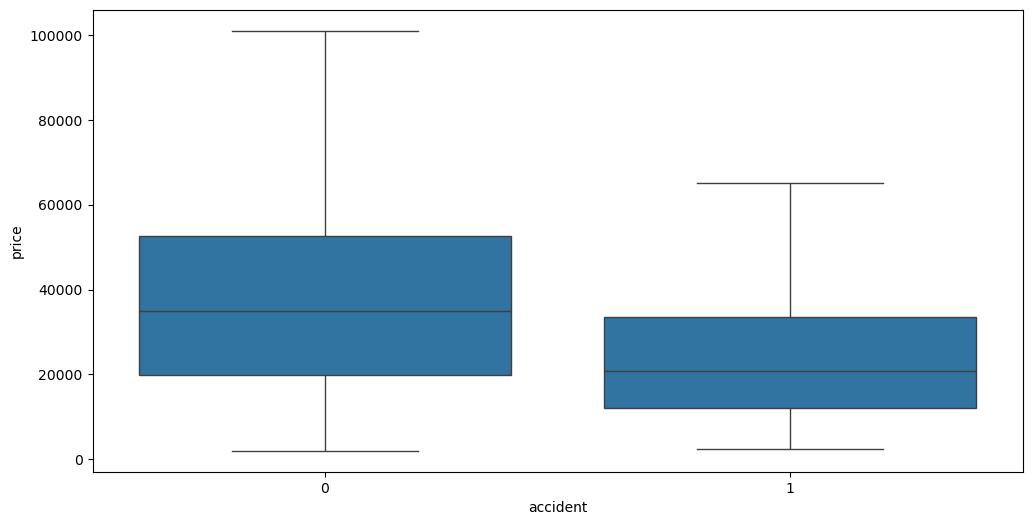

In [43]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'accident', y = 'price', showfliers = False)

plt.show()

- We can see that accidents are not frequent on vehicles that are more recent (models from 3 years ago onward) or if they have a small milage (less than 25000 mi).

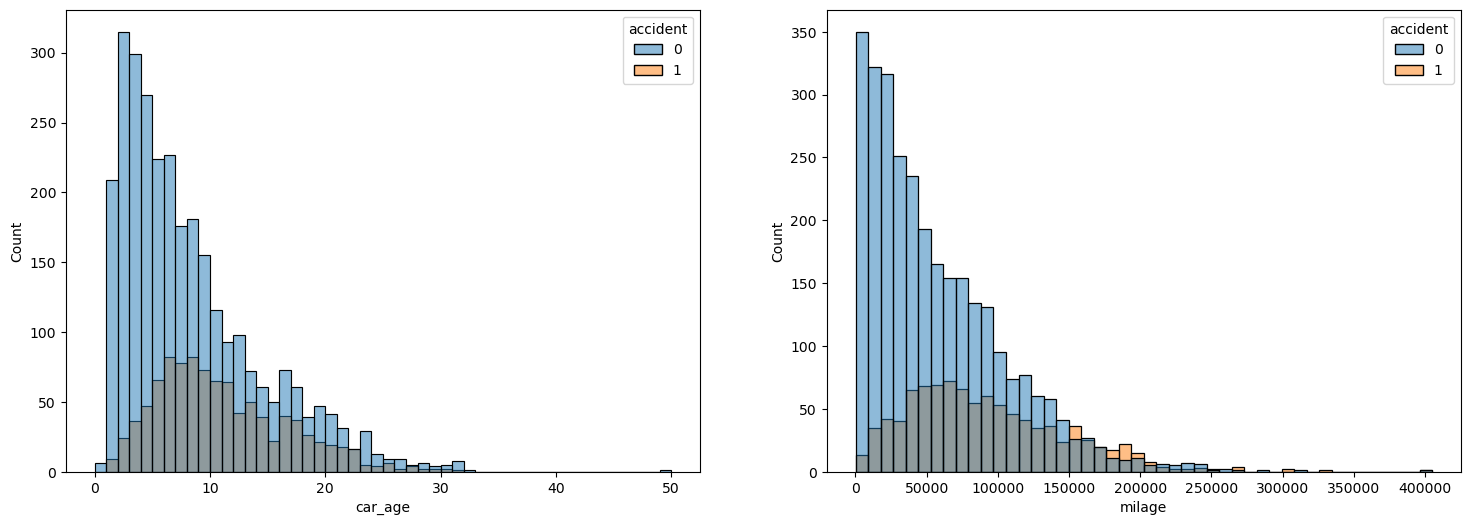

In [44]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df, x = 'car_age', hue = 'accident', ax = axes[0])
sns.histplot(data = df, x = 'milage', hue = 'accident', ax = axes[1])

plt.show()

- A great percentage of cars are from American brands, followed by German and Japanese.

- The prices seem to vary depending on the continent of the brand. European countries have a greater mean price than the American and Asian ones.

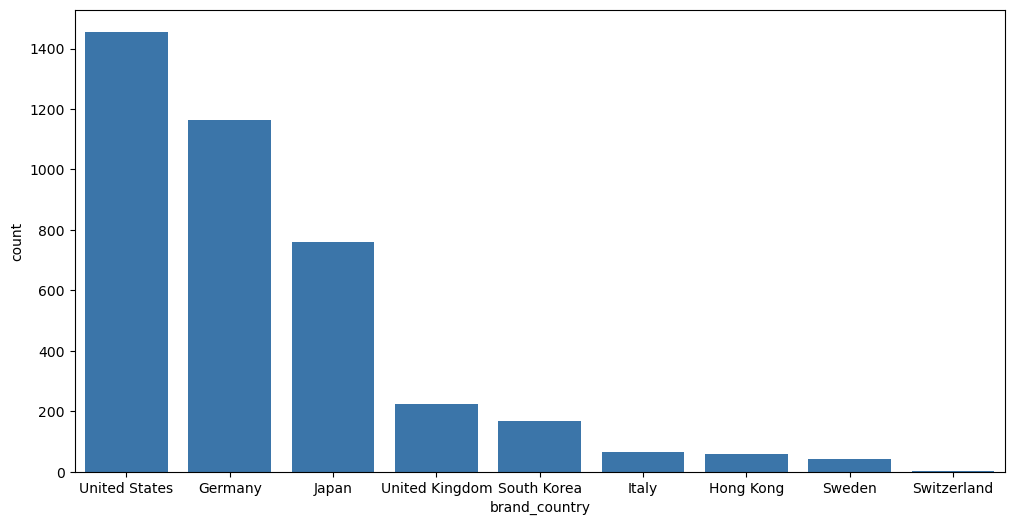

In [45]:
plt.figure(figsize = (12,6))

sns.barplot(data = df['brand_country'].value_counts().reset_index(),
             x = 'brand_country', y = 'count', color = sns.xkcd_rgb['bluish'])

plt.show()

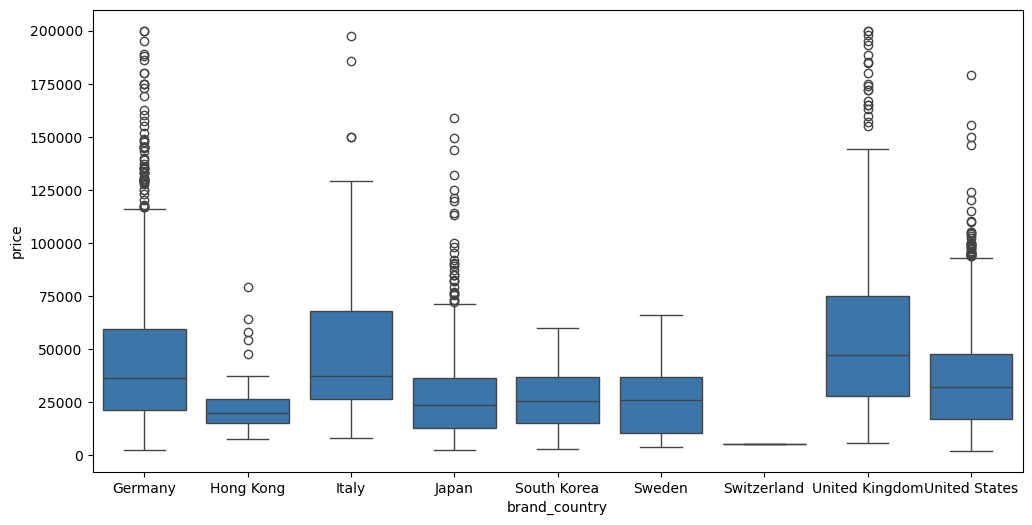

In [46]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'brand_country', y = 'price', color = sns.xkcd_rgb['bluish'], order = df.groupby(['brand_country'])['price'].mean().index.to_list())

plt.show()

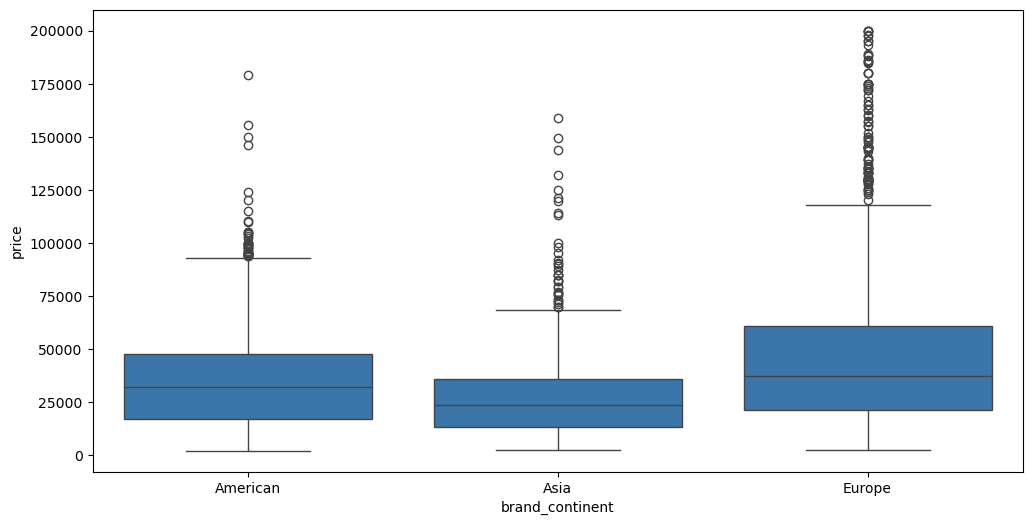

In [47]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'brand_continent', y = 'price',
            color = sns.xkcd_rgb['bluish'], order = df.groupby(['brand_continent'])['price'].mean().index.to_list())

plt.show()

- Through the correlation heatmap we can see the relations previously found contrasting the prices.

- Interestingly, we see that horsepower has a positive correlation between litres and cylinders, which we could use to fill the NaNs of the horsepower feature.

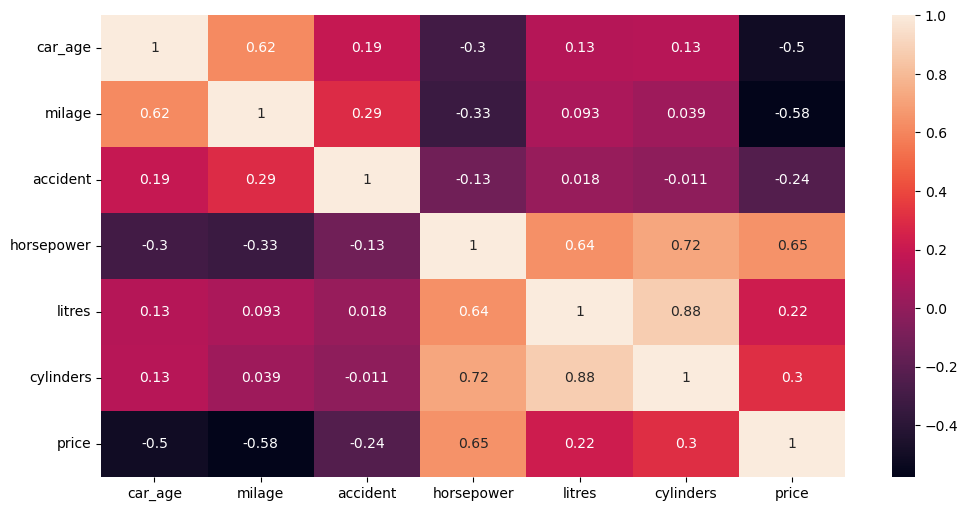

In [48]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['car_age', 'milage', 'accident', 'horsepower', 'litres', 'cylinders' ,'price']].corr(), annot = True)

plt.show()

- We will get the mean horsepower based on the litres and cylinder values of each engine. Then we will merge based on these two features the mean value of horsepower to fill the NaNs.

In [49]:
df = pd.merge(df, df.groupby(['litres', 'cylinders'])['horsepower'].mean().reset_index().rename({'horsepower': 'hp_mean'}, axis = 1),
         'left', ['litres', 'cylinders'])
df.loc[df['horsepower'].isnull() & df['hp_mean'].notnull(), 'horsepower'] = round(df.loc[df['horsepower'].isnull() & df['hp_mean'].notnull(), 'hp_mean'])

In [50]:
1-(len(df[df['horsepower'].isnull()])/len(df))

0.9374682257244535

- We can see that we filled a lot of cases! Still, we have 7% of missing data that we could fill in other way. We'll do exactly the same procedure as before, but now we'll only group by litres.

In [51]:
df = pd.merge(df, df.groupby(['litres'])['horsepower'].mean().reset_index().rename({'horsepower': 'hp_mean_litres'}, axis = 1), 'left', ['litres'])
df.loc[df['horsepower'].isnull() & df['hp_mean_litres'].notnull(), 'horsepower'] = round(df.loc[df['horsepower'].isnull() & df['hp_mean_litres'].notnull(), 'hp_mean_litres'])

In [52]:
1-(len(df[df['horsepower'].isnull()])/len(df))

0.9783934926283681

- We still have a 3%. We can do the same grouping by brand and filling in the missing values. For the rest of missing values we simply fill by the mean horsepower.

In [53]:
df = pd.merge(df, df.groupby(['brand'])['horsepower'].mean().reset_index().rename({'horsepower': 'hp_mean_brand'}, axis = 1), 'left', ['brand'])
df.loc[df['horsepower'].isnull() & df['hp_mean_brand'].notnull(), 'horsepower'] = round(df.loc[df['horsepower'].isnull() & df['hp_mean_brand'].notnull(), 'hp_mean_brand'])
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

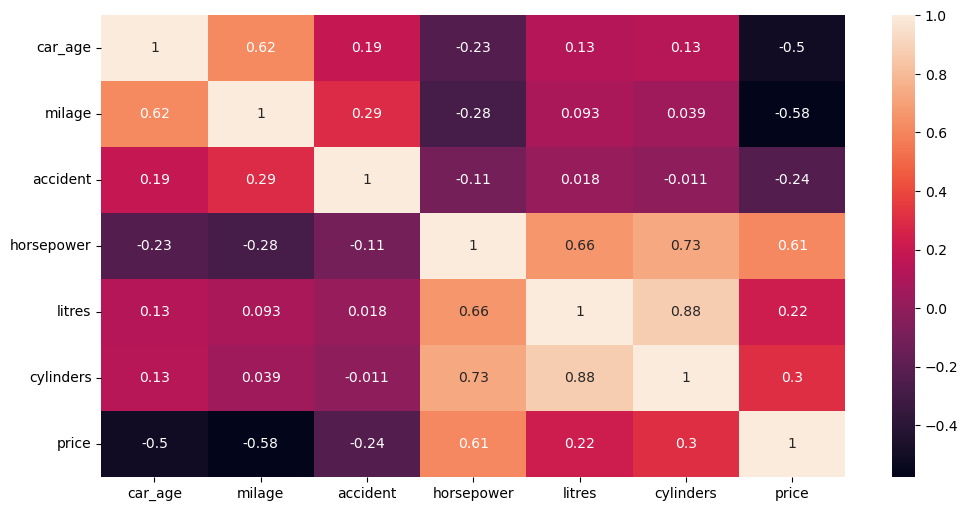

In [54]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['car_age', 'milage', 'accident', 'horsepower', 'litres', 'cylinders' ,'price']].corr(), annot = True)

plt.show()

# **Remove skewness from numerical value columns**

In [55]:
import pandas as pd
from scipy.stats import skew
def skewness_graph():
  # Assuming 'df' contains your DataFrame with features for MLR
  # Select numeric features (you can adjust this based on your actual data)
  numeric_features = df.select_dtypes(include=['float64', 'int64'])

  # Calculate skewness for each numeric feature
  skewness = numeric_features.apply(lambda x: skew(x.dropna()))

  # Create a DataFrame to display skewness of features
  skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})

  print("Skewness of Features:")
  print(skewness_df)

  # Plot histograms and density plots for all numerical features
  for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))

    # Plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=False, bins=10)  # Adjust bins for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot density plot (kernel density estimate)
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

Skewness of Features:
          Feature  Skewness
0     clean_title -2.020638
1      horsepower  0.950237
2          litres  0.514321
3       cylinders  0.567341
4         car_age  1.079908
5         hp_mean  0.392266
6  hp_mean_litres  0.230340
7   hp_mean_brand  1.590461


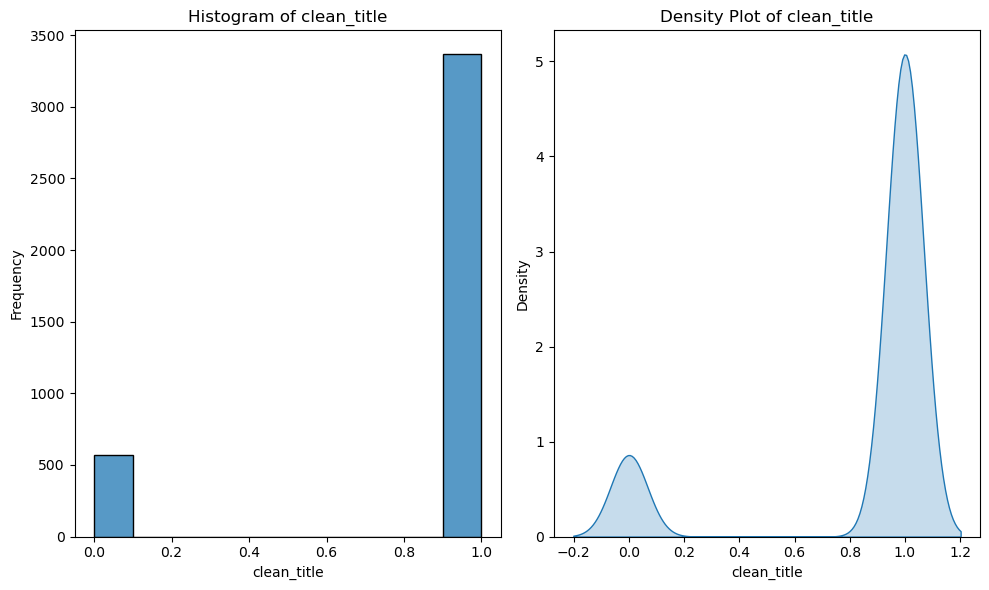

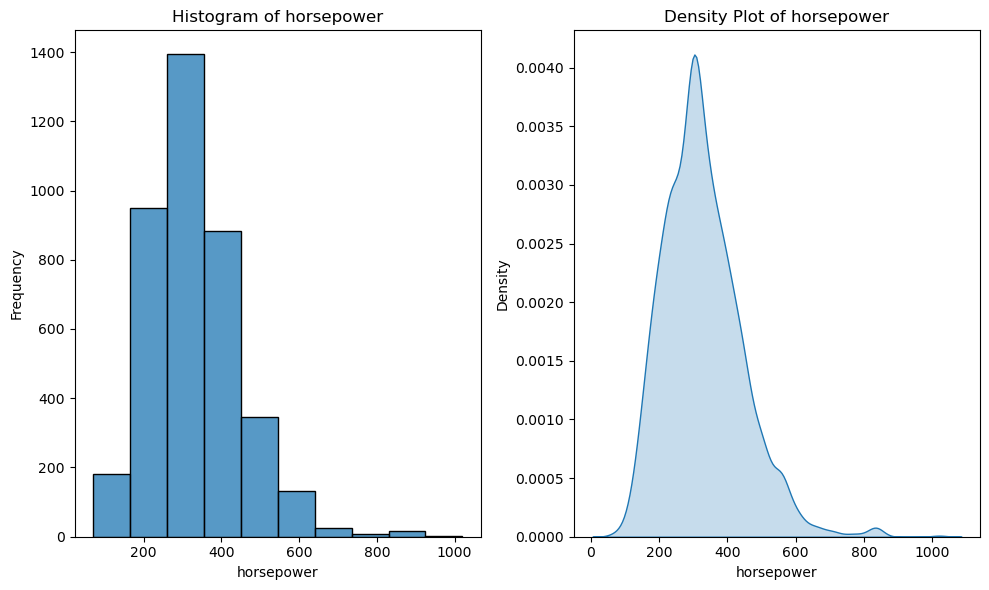

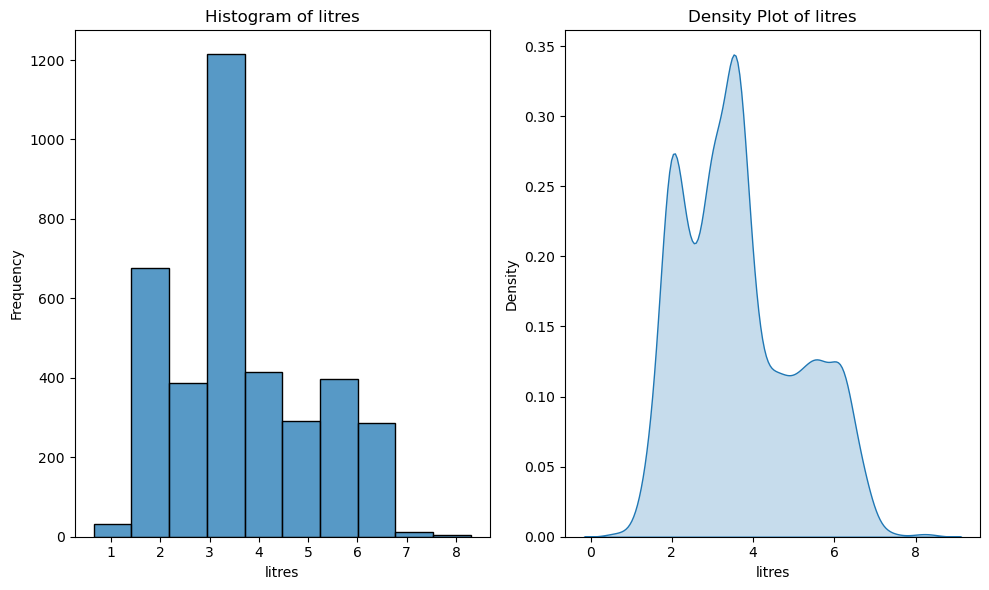

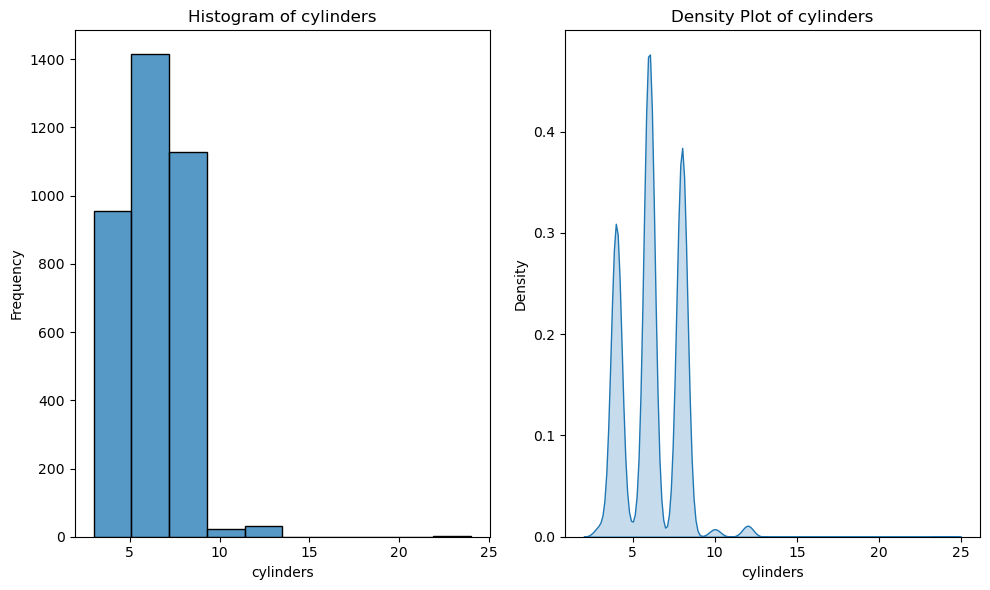

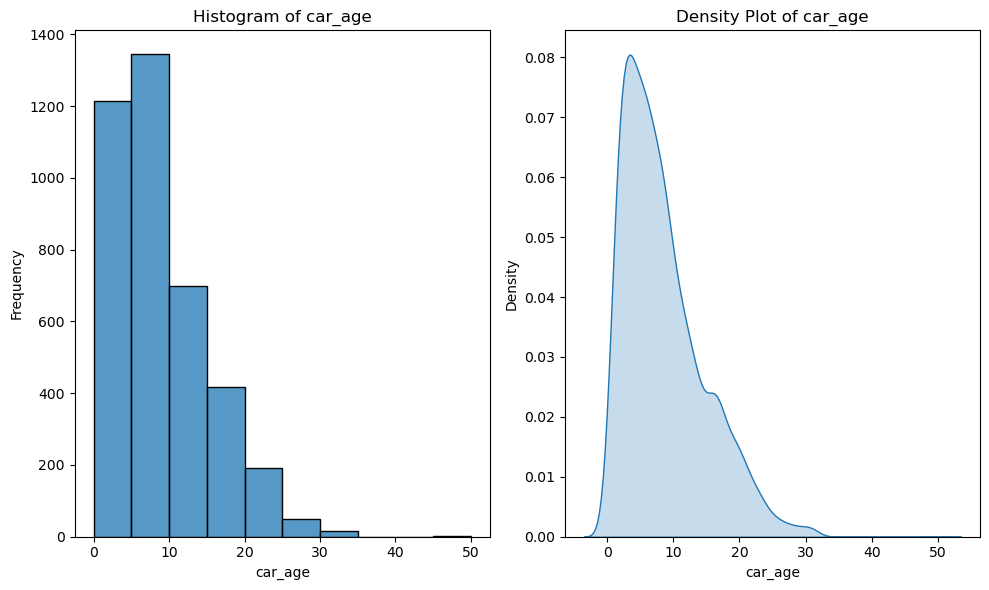

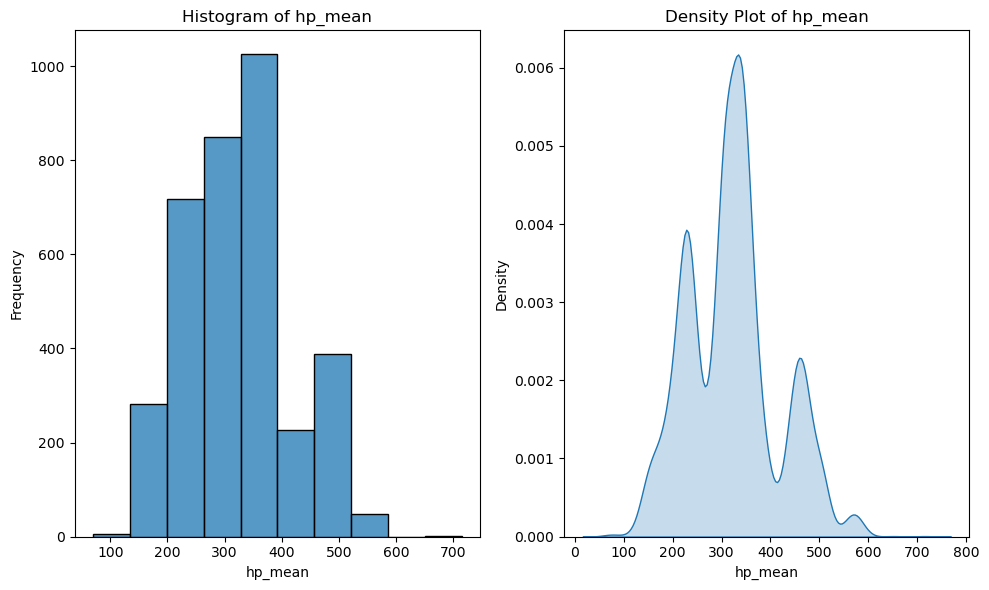

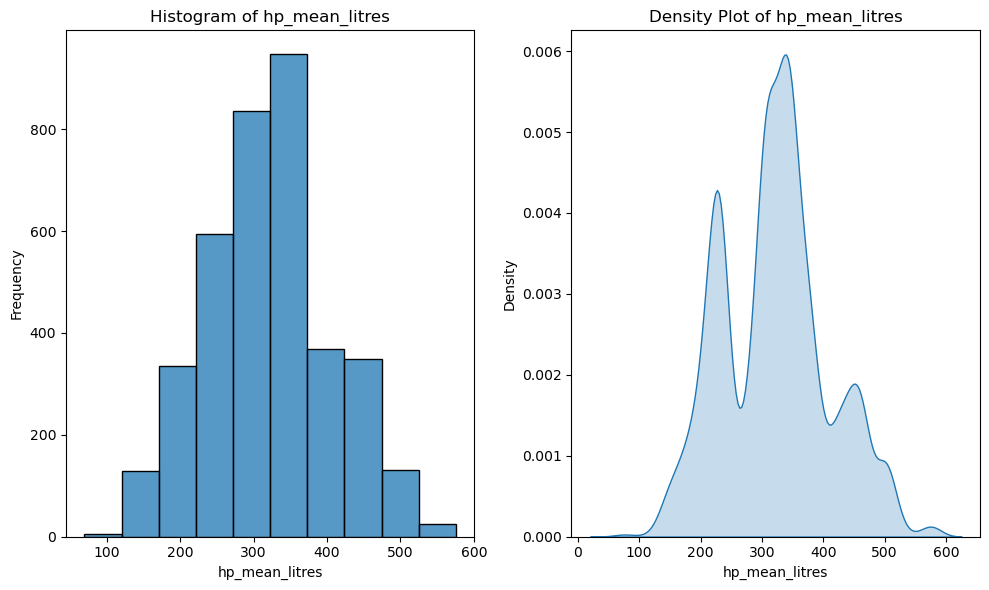

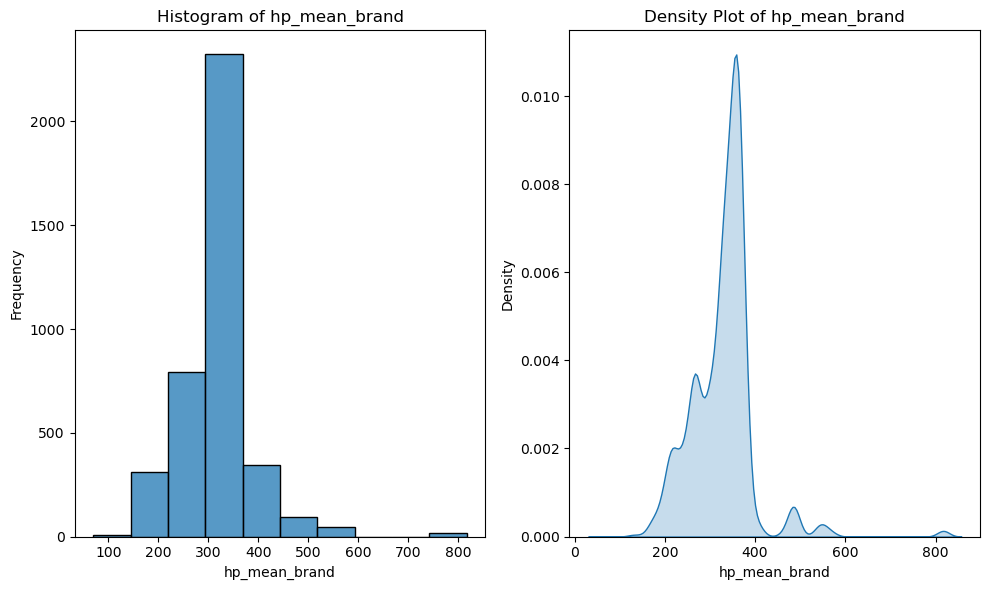

In [56]:
skewness_graph()

In [57]:
df.head()

brand                            model  milage      fuel_type  \
0      Ford  Utility Police Interceptor Base   51000  E85 Flex Fuel   
1   Hyundai                     Palisade SEL   34742       Gasoline   
2     Lexus                    RX 350 RX 350   22372       Gasoline   
3  INFINITI                 Q50 Hybrid Sport   88900         Hybrid   
4      Audi        Q3 45 S line Premium Plus    9835       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
2                                     3.5 Liter DOHC          Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
4                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   

                  ext_col int_col  accident  clean_title  ...  horsepower  \
0                   Black   Black         1          1.0  ...       300.0   
1         Moonlight Cloud    Gray         1          1.0  ...       338.0   
2                    Blue   Black         0          0.0  ...       309.0   
3                   Black   Black         0          1.0  ...       354.0   
4  Glacier White Metallic   Black         0          0.0  ...       231.0   

  litres cylinders        tsm  exterior_color  interior_color  car_age  \
0    3.7       6.0  Automatic           Black           Black       11   
1    3.8       6.0  Automatic           Other           Other        3   
2    3.5       NaN  Automatic           Other           Black        2   
3    3.5       6.0  Automatic           Black           Black        9   
4    2.0       4.0  Automatic           White           Black        3   

      hp_mean hp_mean_litres hp_mean_brand  
0  296.631579     292.177419    331.904509  
1  337.658537     348.920000    241.791667  
2         NaN     309.138554    302.785276  
3  309.611722     309.138554    336.694915  
4  230.852417     231.602105    321.434343  

[5 rows x 24 columns]

**As 1 value is Nan in hp_mean_brand column we are placing it with mean value of hp_mean_brand for successfully applying box-cox and remove skeweness**




In [58]:
import numpy as np

# Calculate the mean of hp_mean_brand column excluding null values
mean_hp_mean_brand = df['hp_mean_brand'].mean()

# Fill the null value with the mean
df['hp_mean_brand'].fillna(mean_hp_mean_brand, inplace=True)

# Print the DataFrame after filling null value
df.head()


brand                            model  milage      fuel_type  \
0      Ford  Utility Police Interceptor Base   51000  E85 Flex Fuel   
1   Hyundai                     Palisade SEL   34742       Gasoline   
2     Lexus                    RX 350 RX 350   22372       Gasoline   
3  INFINITI                 Q50 Hybrid Sport   88900         Hybrid   
4      Audi        Q3 45 S line Premium Plus    9835       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
2                                     3.5 Liter DOHC          Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
4                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   

                  ext_col int_col  accident  clean_title  ...  horsepower  \
0                   Black   Black         1          1.0  ...       300.0   
1         Moonlight Cloud    Gray         1          1.0  ...       338.0   
2                    Blue   Black         0          0.0  ...       309.0   
3                   Black   Black         0          1.0  ...       354.0   
4  Glacier White Metallic   Black         0          0.0  ...       231.0   

  litres cylinders        tsm  exterior_color  interior_color  car_age  \
0    3.7       6.0  Automatic           Black           Black       11   
1    3.8       6.0  Automatic           Other           Other        3   
2    3.5       NaN  Automatic           Other           Black        2   
3    3.5       6.0  Automatic           Black           Black        9   
4    2.0       4.0  Automatic           White           Black        3   

      hp_mean hp_mean_litres hp_mean_brand  
0  296.631579     292.177419    331.904509  
1  337.658537     348.920000    241.791667  
2         NaN     309.138554    302.785276  
3  309.611722     309.138554    336.694915  
4  230.852417     231.602105    321.434343  

[5 rows x 24 columns]

In [59]:
from scipy.stats import boxcox
import numpy as np

# Skewed features and their skewness values
# Below values we got from calculating skewness
skewed_features = {
    'milage': 1.153055,
    'price': 1.966508,
    'horsepower': 0.950237,
    'litres': 0.514321,
    'cylinders': 0.567341,
    'hp_mean': 0.392266,
    'hp_mean_litres': 0.230340,
    'hp_mean_brand': 1.590461
}

null_counts = df.isnull().sum()

# Print the null counts for each feature
print("Null Value Counts:")
print(null_counts)

# Threshold for significant skewness (absolute value)
skew_threshold = 1
lambda_values = {}  # Dictionary to store lambda values for each feature

# Apply Box-Cox transformation to features with significant skewness
for feature, skewness in skewed_features.items():
      if abs(skewness) > skew_threshold:
        # Add 1 to handle non-positive values (Box-Cox requires strictly positive values)
        transformed_feature, lambda_val = boxcox(df[feature] + 1)

        # Replace the original feature with the transformed feature in the DataFrame
        df[feature] = transformed_feature

        # Print the lambda value (if needed for later inverse transformation)
        print(f'Lambda value for {feature}: {lambda_val}')
        lambda_values[feature] = lambda_val
# Print DataFrame with transformed features


Null Value Counts:
brand                0
model                0
milage               0
fuel_type          170
engine               0
transmission         0
ext_col              0
int_col              0
accident             0
clean_title          0
price                0
brand_country        0
brand_continent      0
fuel                 0
horsepower           0
litres             217
cylinders          382
tsm                  0
exterior_color       0
interior_color       0
car_age              0
hp_mean            388
hp_mean_litres     217
hp_mean_brand        0
dtype: int64
Lambda value for milage: 0.3938530493655743
Lambda value for price: 0.1396206234325625
Lambda value for hp_mean_brand: 0.2461738353998843


Skewness of Features:
          Feature  Skewness
0          milage -0.092944
1     clean_title -2.020638
2           price -0.007025
3      horsepower  0.950237
4          litres  0.514321
5       cylinders  0.567341
6         car_age  1.079908
7         hp_mean  0.392266
8  hp_mean_litres  0.230340
9   hp_mean_brand  0.055065


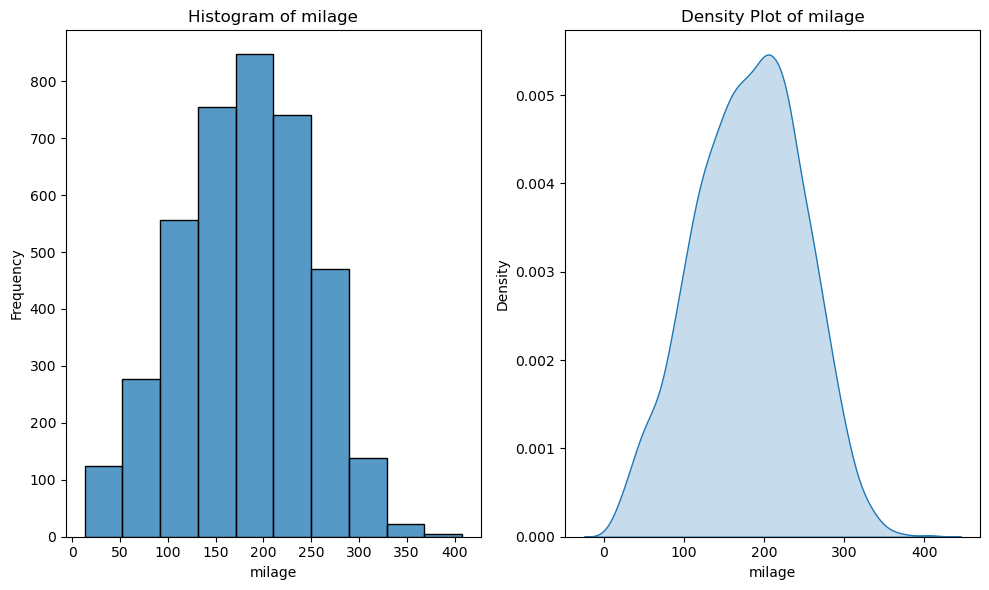

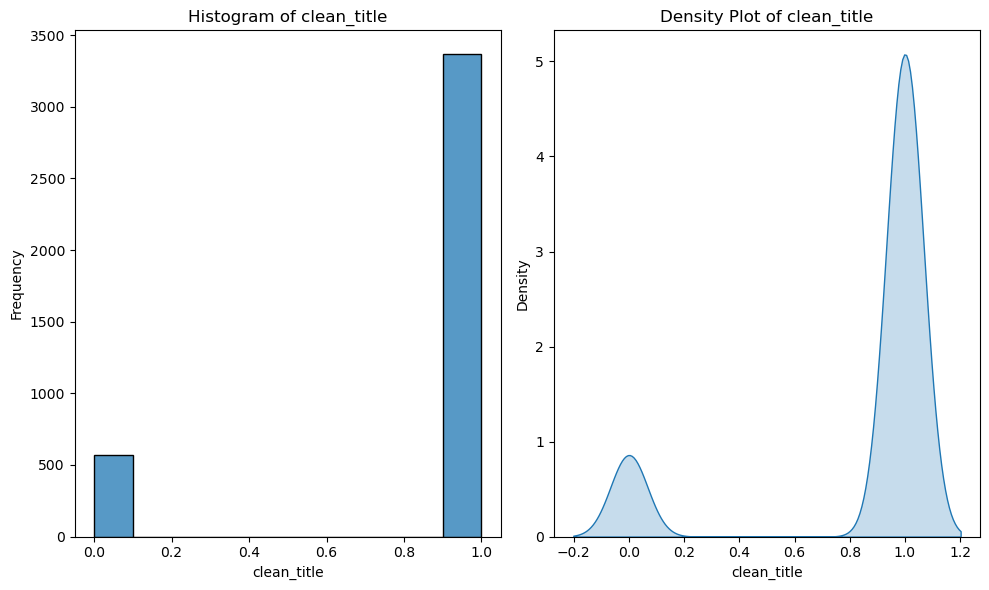

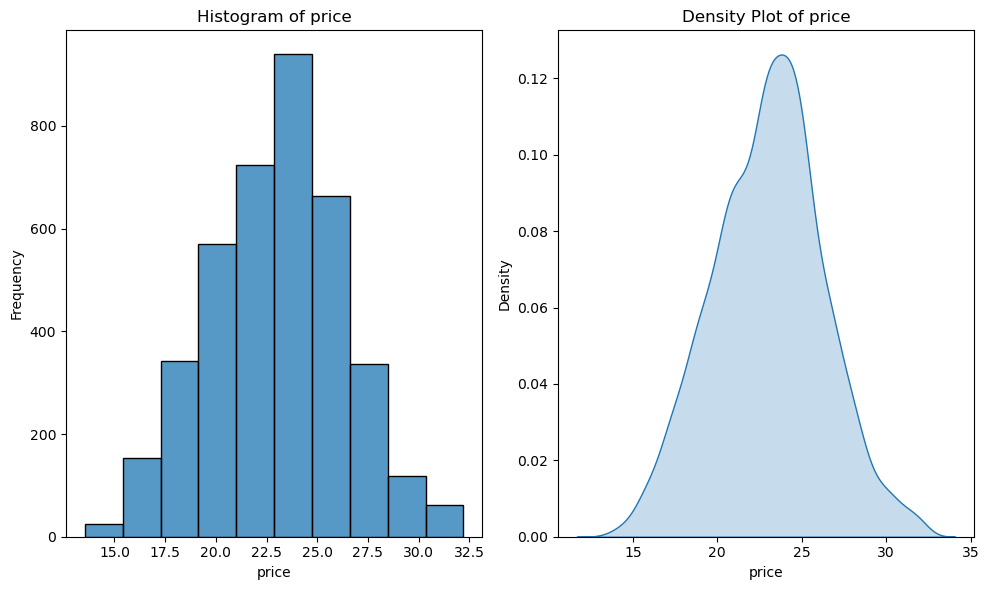

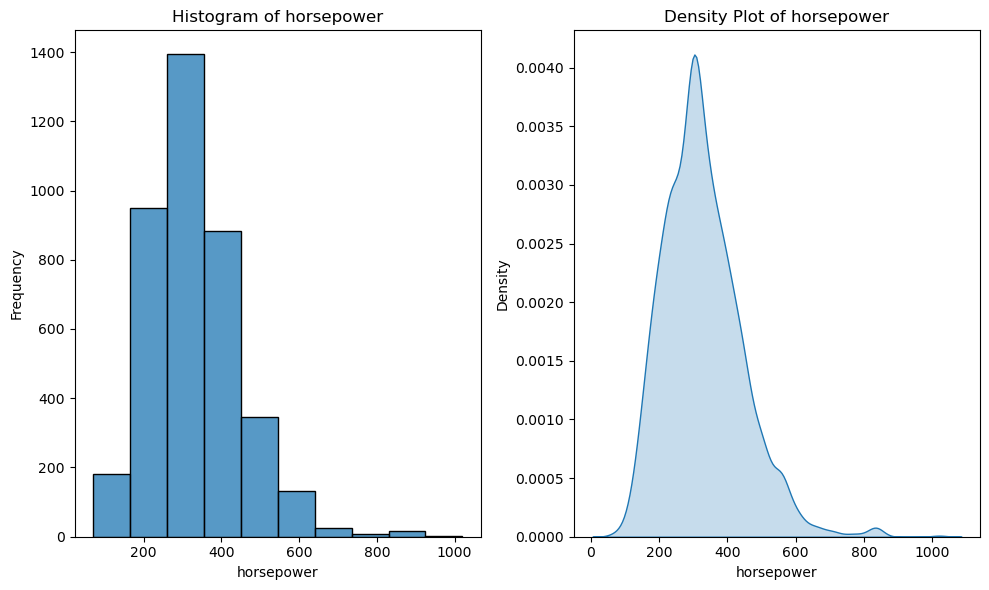

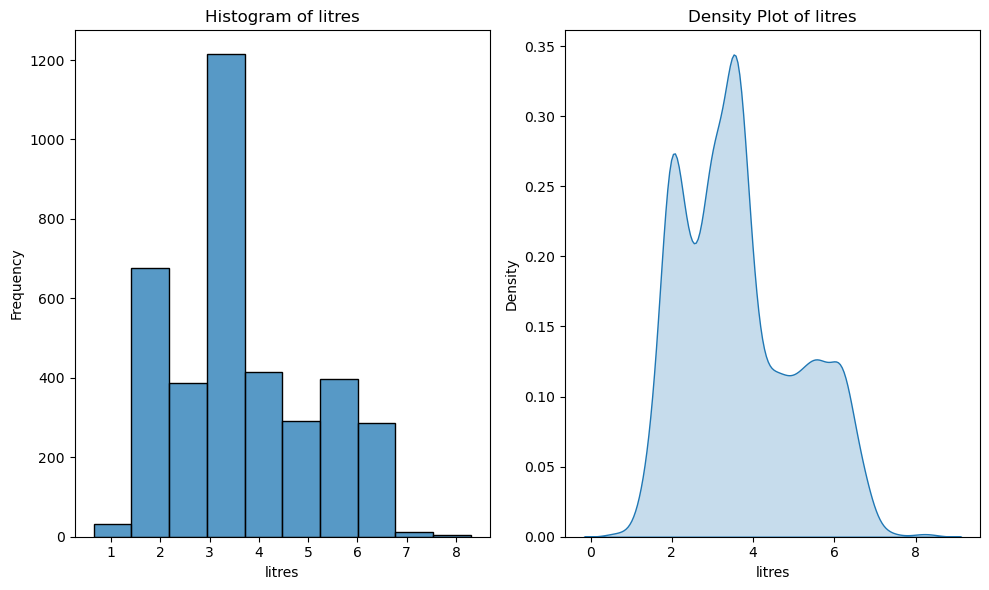

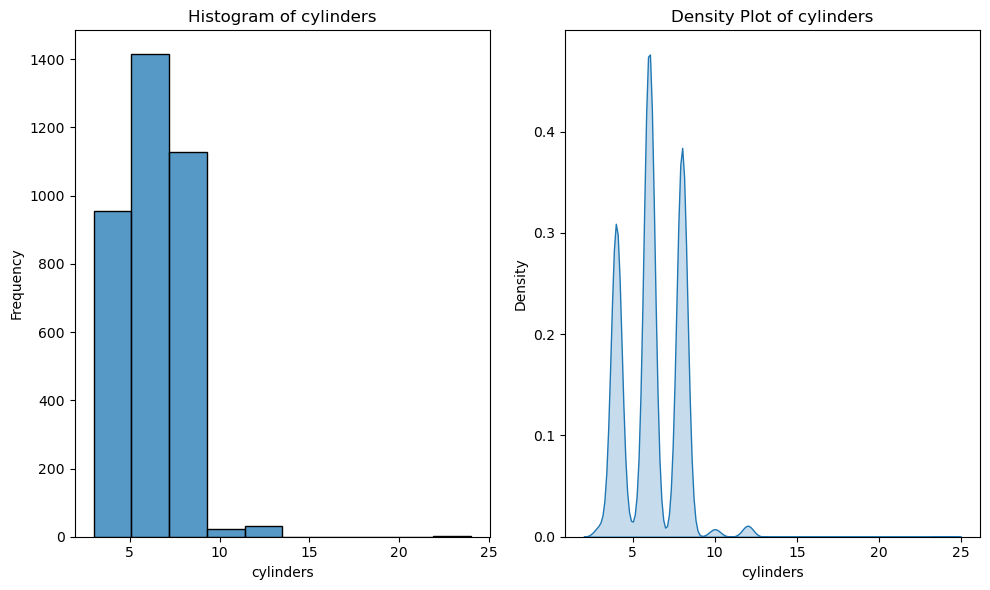

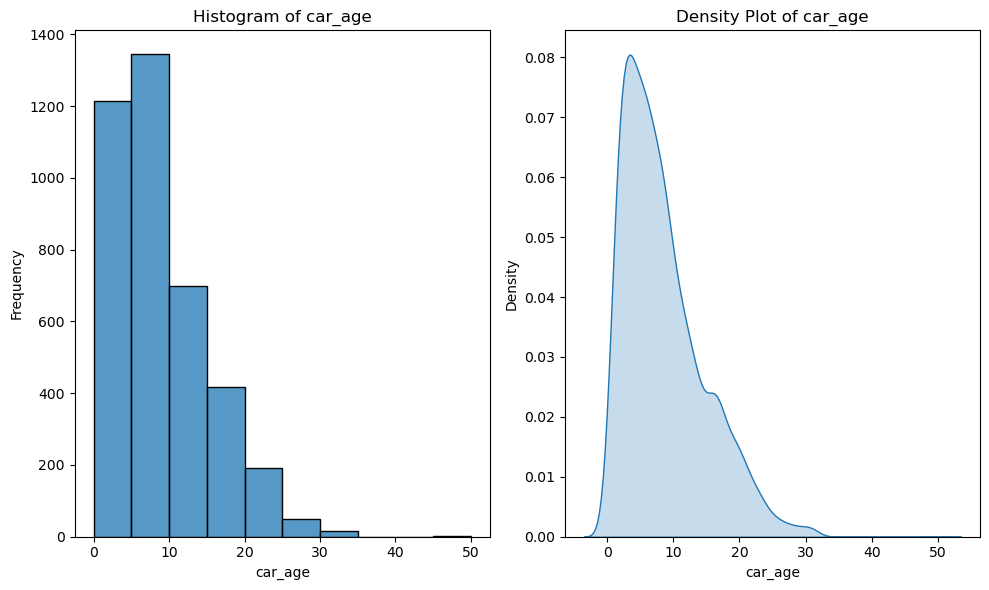

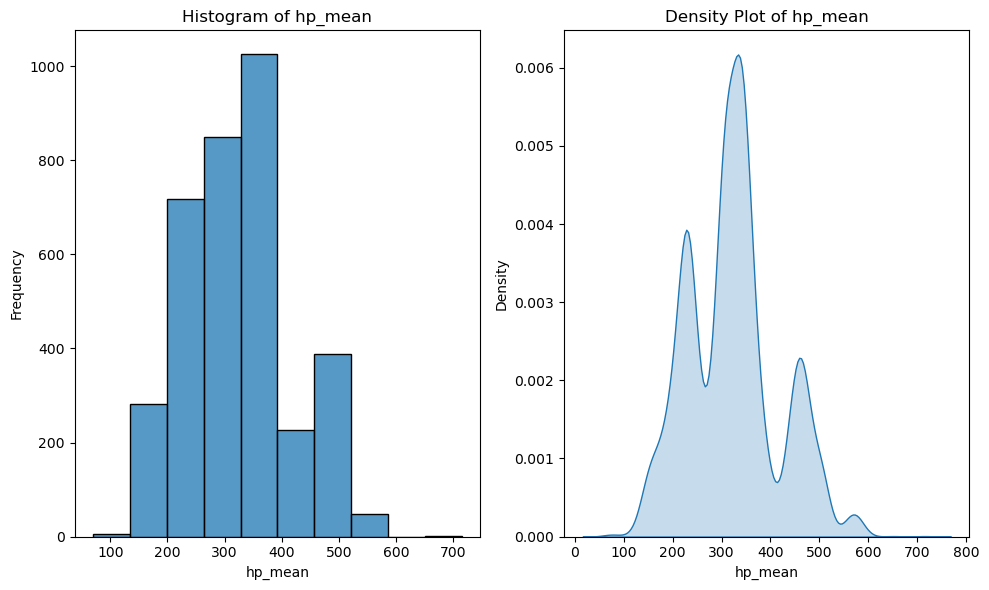

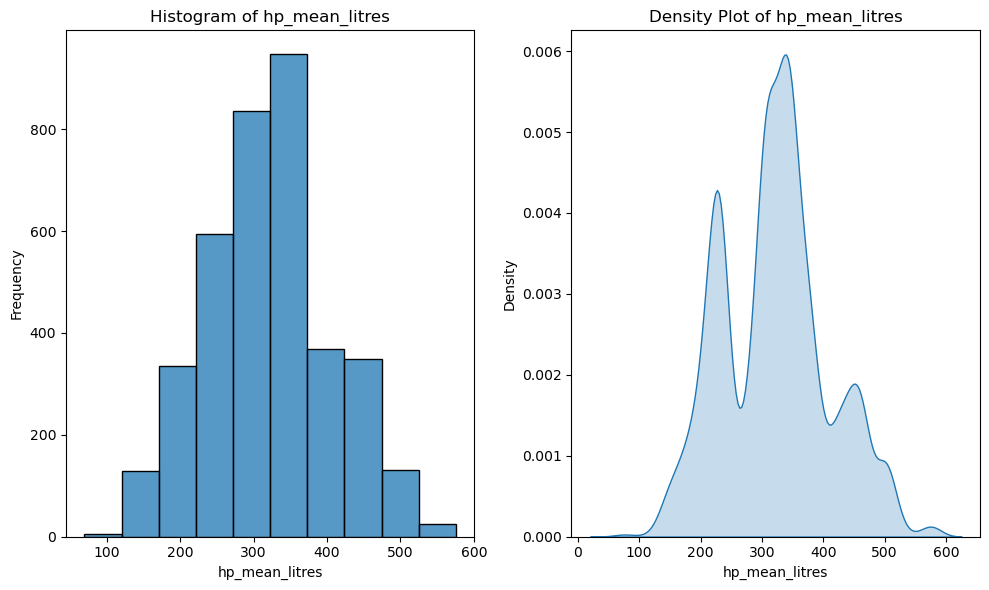

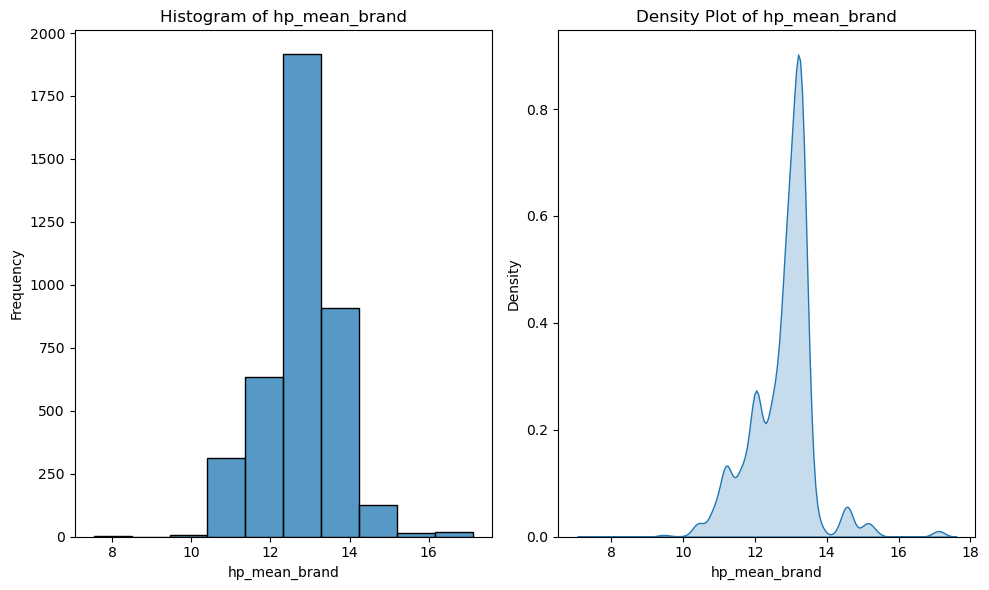

In [60]:
skewness_graph()

In [61]:
df.head()

brand                            model      milage      fuel_type  \
0      Ford  Utility Police Interceptor Base  178.912251  E85 Flex Fuel   
1   Hyundai                     Palisade SEL  153.452228       Gasoline   
2     Lexus                    RX 350 RX 350  128.625974       Gasoline   
3  INFINITI                 Q50 Hybrid Sport  223.304568         Hybrid   
4      Audi        Q3 45 S line Premium Plus   92.357338       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
2                                     3.5 Liter DOHC          Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
4                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   

                  ext_col int_col  accident  clean_title  ...  horsepower  \
0                   Black   Black         1          1.0  ...       300.0   
1         Moonlight Cloud    Gray         1          1.0  ...       338.0   
2                    Blue   Black         0          0.0  ...       309.0   
3                   Black   Black         0          1.0  ...       354.0   
4  Glacier White Metallic   Black         0          0.0  ...       231.0   

  litres cylinders        tsm  exterior_color  interior_color  car_age  \
0    3.7       6.0  Automatic           Black           Black       11   
1    3.8       6.0  Automatic           Other           Other        3   
2    3.5       NaN  Automatic           Other           Black        2   
3    3.5       6.0  Automatic           Black           Black        9   
4    2.0       4.0  Automatic           White           Black        3   

      hp_mean hp_mean_litres hp_mean_brand  
0  296.631579     292.177419     12.908040  
1  337.658537     348.920000     11.639298  
2         NaN     309.138554     12.529919  
3  309.611722     309.138554     12.967831  
4  230.852417     231.602105     12.775063  

[5 rows x 24 columns]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3934 non-null   object 
 1   model            3934 non-null   object 
 2   milage           3934 non-null   float64
 3   fuel_type        3764 non-null   object 
 4   engine           3934 non-null   object 
 5   transmission     3934 non-null   object 
 6   ext_col          3934 non-null   object 
 7   int_col          3934 non-null   object 
 8   accident         3934 non-null   int32  
 9   clean_title      3934 non-null   float64
 10  price            3934 non-null   float64
 11  brand_country    3934 non-null   object 
 12  brand_continent  3934 non-null   object 
 13  fuel             3934 non-null   object 
 14  horsepower       3934 non-null   float64
 15  litres           3717 non-null   float64
 16  cylinders        3552 non-null   float64
 17  tsm           

In [63]:
df.describe()
df.describe(include=object)

brand    model fuel_type                      engine transmission  \
count   3934     3934      3764                        3934         3934   
unique    56     1858         7                        1107           58   
top     Ford  M3 Base  Gasoline  2.0L I4 16V GDI DOHC Turbo          A/T   
freq     385       30      3235                          50         1032   

       ext_col int_col  brand_country brand_continent      fuel        tsm  \
count     3934    3934           3934            3934      3934       3934   
unique     293     144              9               3         6          4   
top      Black   Black  United States          Europe  Gasoline  Automatic   
freq       893    1997           1456            1491      3235       3155   

       exterior_color interior_color  
count            3934           3934  
unique              3              3  
top             Other          Black  
freq             2026           2122

We will drop some columns from which we have already extracted the information like engine, fuel_type or which were created during cleaning like hp_mean, hp_mean_litres or which have a large number of categoreis like model(more than 1800 categories) because if we use one-hot encoding on them, it will become problematic for us.

In [64]:
df.drop(['transmission','hp_mean','hp_mean_litres','hp_mean_brand','clean_title','fuel_type','ext_col','int_col','engine','model'],axis=1,inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3934 non-null   object 
 1   milage           3934 non-null   float64
 2   accident         3934 non-null   int32  
 3   price            3934 non-null   float64
 4   brand_country    3934 non-null   object 
 5   brand_continent  3934 non-null   object 
 6   fuel             3934 non-null   object 
 7   horsepower       3934 non-null   float64
 8   litres           3717 non-null   float64
 9   cylinders        3552 non-null   float64
 10  tsm              3934 non-null   object 
 11  exterior_color   3934 non-null   object 
 12  interior_color   3934 non-null   object 
 13  car_age          3934 non-null   int64  
dtypes: float64(5), int32(1), int64(1), object(7)
memory usage: 415.0+ KB


Now brand is the only categorical variable, which have large number of categories and can potentially influence the results of the model, so we will use some domain knowledge to incorporate the information of brand.

In [65]:
df.brand.value_counts()

brand
Ford             385
BMW              375
Mercedes-Benz    307
Chevrolet        292
Audi             200
Toyota           199
Porsche          188
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         106
RAM               91
GMC               91
Dodge             89
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
MINI              33
Maserati          31
Buick             30
Chrysler          28
Bentley           26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Aston              8
Scion              6
FIAT               5
Saturn             5
Lamborghini        5
Lotus              4
McLaren            4
Ferrari            4
Lucid              3
Rolls-R

Importing the brand scores based on different critera table. It was created based on 5 different features. Safety and durability, maintenance, performance efficiency, Luxury and comfort.


In [66]:
bm=pd.read_csv(r"C:\Users\srikr\Documents\GitHub\Second Hand Car Price Prediction\Car_brands_metrics.csv")

In [67]:
new_df=pd.merge(df,bm,left_on='brand',right_on='Brand')

In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   3934 non-null   object 
 1   milage                  3934 non-null   float64
 2   accident                3934 non-null   int32  
 3   price                   3934 non-null   float64
 4   brand_country           3934 non-null   object 
 5   brand_continent         3934 non-null   object 
 6   fuel                    3934 non-null   object 
 7   horsepower              3934 non-null   float64
 8   litres                  3717 non-null   float64
 9   cylinders               3552 non-null   float64
 10  tsm                     3934 non-null   object 
 11  exterior_color          3934 non-null   object 
 12  interior_color          3934 non-null   object 
 13  car_age                 3934 non-null   int64  
 14  Index                   3934 non-null   

In [69]:
new_df.rename({'Safety & Durability':'b_durability','Maintenance':'b_Maintenance','Performance Efficiency':'b_efficiency','Luxury':'b_luxury','Comfort':'b_comfort','Ownership Cost': 'b_own_cost'},axis=1,inplace=True)

In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3934 non-null   object 
 1   milage           3934 non-null   float64
 2   accident         3934 non-null   int32  
 3   price            3934 non-null   float64
 4   brand_country    3934 non-null   object 
 5   brand_continent  3934 non-null   object 
 6   fuel             3934 non-null   object 
 7   horsepower       3934 non-null   float64
 8   litres           3717 non-null   float64
 9   cylinders        3552 non-null   float64
 10  tsm              3934 non-null   object 
 11  exterior_color   3934 non-null   object 
 12  interior_color   3934 non-null   object 
 13  car_age          3934 non-null   int64  
 14  Index            3934 non-null   int64  
 15  Brand            3934 non-null   object 
 16  b_durability     3934 non-null   int64  
 17  b_Maintenance 

In [71]:
new_df.drop(['brand','Brand','Index'],axis=1,inplace=True)

In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   milage           3934 non-null   float64
 1   accident         3934 non-null   int32  
 2   price            3934 non-null   float64
 3   brand_country    3934 non-null   object 
 4   brand_continent  3934 non-null   object 
 5   fuel             3934 non-null   object 
 6   horsepower       3934 non-null   float64
 7   litres           3717 non-null   float64
 8   cylinders        3552 non-null   float64
 9   tsm              3934 non-null   object 
 10  exterior_color   3934 non-null   object 
 11  interior_color   3934 non-null   object 
 12  car_age          3934 non-null   int64  
 13  b_durability     3934 non-null   int64  
 14  b_Maintenance    3934 non-null   int64  
 15  b_efficiency     3934 non-null   int64  
 16  b_luxury         3934 non-null   int64  
 17  b_comfort     

In [73]:
from sklearn.impute import KNNImputer
imp_values = KNNImputer(n_neighbors=5)
K=imp_values.fit_transform(new_df.select_dtypes(include=[np.number]))

In [74]:
new_df_num=pd.DataFrame(K,columns=new_df.select_dtypes(include=[np.number]).columns)
new_df_cat=new_df.select_dtypes(exclude=[np.number])


Introducing polynomial features from numerical features upto degree 3

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=2,include_bias=False)

new_df_poly_num=pd.DataFrame(poly_feat.fit_transform(new_df_num),columns=poly_feat.get_feature_names_out())

In [76]:
new_df_poly=pd.concat([new_df_poly_num,new_df_cat],axis=1)

Checking the correlation and possibility of multicollinearity in numerical data.

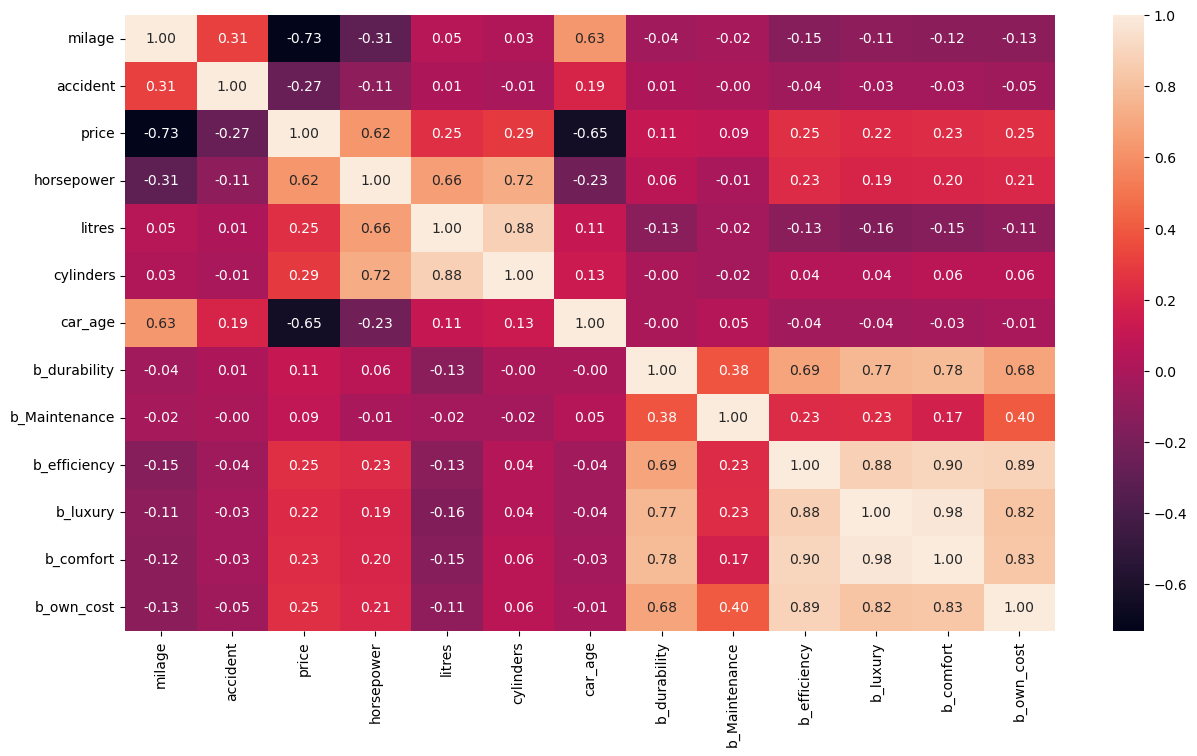

In [77]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(new_df_num.corr(),annot=True,fmt='0.2f')
plt.show()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
{new_df_num.columns[i]:vif(new_df_num,exog_idx=i) for i in range(0,new_df_num.shape[1])}

{'milage': 18.13509075955923,
 'accident': 1.4866696039793887,
 'price': 184.34683648009687,
 'horsepower': 35.274764653986,
 'litres': 45.06918375990669,
 'cylinders': 89.84864979434953,
 'car_age': 6.910580817356346,
 'b_durability': 202.06038939032786,
 'b_Maintenance': 114.85146954243696,
 'b_efficiency': 323.40758169116356,
 'b_luxury': 223.636999461777,
 'b_comfort': 1146.9727325253734,
 'b_own_cost': 253.88420456038304}

As we can observe, there is strong possibility of multicollearity, as VIF higher than 10 indicate a strong multicolliearity. We can see some features like 'b_durability', 'b_Maintenance', 'b_efficiency', 'luxury', 'b_comfort', 'b_own_cost' 'litres' 'cylinders' and 'price' have very high value of VIF score. But we are not dropping any of the features as of now, we will do feature selection through forward selection and backward elimination method after fitting a basic MLR model.

Checking correlation and possibility of multicolliearity in polynomials

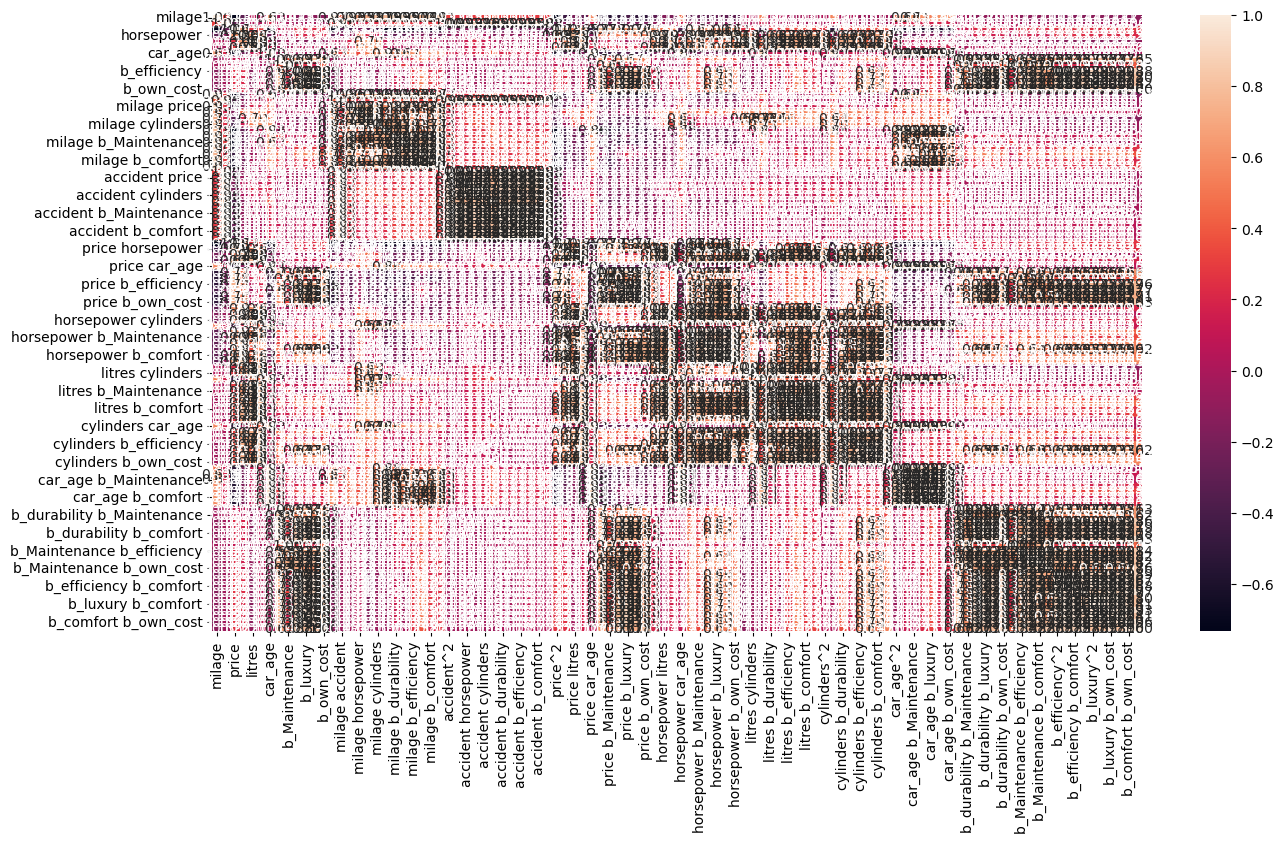

In [79]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(new_df_poly_num.corr(),annot=True,fmt='0.2f')
plt.show()


In [80]:
{new_df_poly_num.columns[i]:vif(new_df_poly_num,exog_idx=i) for i in range(0,new_df_poly_num.shape[1])}

{'milage': 2116.841073239258,
 'accident': inf,
 'price': 3642.930010608897,
 'horsepower': 3062.668047051439,
 'litres': 6676.3099907566475,
 'cylinders': 5476.623182702684,
 'car_age': 1369.920679197362,
 'b_durability': inf,
 'b_Maintenance': inf,
 'b_efficiency': inf,
 'b_luxury': inf,
 'b_comfort': inf,
 'b_own_cost': inf,
 'milage^2': 101.93602800261824,
 'milage accident': 40.54859569664759,
 'milage price': 475.4345635994,
 'milage horsepower': 110.27038986967636,
 'milage litres': 256.55996902219397,
 'milage cylinders': 420.1806989187736,
 'milage car_age': 89.49103898668818,
 'milage b_durability': 780.6317898606204,
 'milage b_Maintenance': 581.9092260765603,
 'milage b_efficiency': 1329.143254547855,
 'milage b_luxury': 1698.849930680372,
 'milage b_comfort': 5611.628103548289,
 'milage b_own_cost': 1201.0477478972703,
 'accident^2': inf,
 'accident price': 268.56401614112383,
 'accident horsepower': 51.76396493869778,
 'accident litres': 61.71276913669168,
 'accident cyli

Other categorical variables have less number of categories, so those can be handled with one-hot encoding.

In [81]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
cat=encoder.fit_transform(new_df_cat)
new_df_cat=pd.DataFrame(cat.toarray(),columns=encoder.get_feature_names_out())

In [82]:
new_df_cat.head()

brand_country_Germany  brand_country_Hong Kong  brand_country_Italy  \
0                    0.0                      0.0                  0.0   
1                    0.0                      0.0                  0.0   
2                    0.0                      0.0                  0.0   
3                    0.0                      1.0                  0.0   
4                    1.0                      0.0                  0.0   

   brand_country_Japan  brand_country_South Korea  brand_country_Sweden  \
0                  0.0                        0.0                   0.0   
1                  0.0                        1.0                   0.0   
2                  1.0                        0.0                   0.0   
3                  0.0                        0.0                   0.0   
4                  0.0                        0.0                   0.0   

   brand_country_Switzerland  brand_country_United Kingdom  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   

   brand_country_United States  brand_continent_American  ...  tsm_Automatic  \
0                          1.0                       1.0  ...            1.0   
1                          0.0                       0.0  ...            1.0   
2                          0.0                       0.0  ...            1.0   
3                          0.0                       0.0  ...            1.0   
4                          0.0                       0.0  ...            1.0   

   tsm_DCT  tsm_Manual  tsm_Other  exterior_color_Black  exterior_color_Other  \
0      0.0         0.0        0.0                   1.0                   0.0   
1      0.0         0.0        0.0                   0.0                   1.0   
2      0.0         0.0        0.0                   0.0                   1.0   
3      0.0         0.0        0.0                   1.0                   0.0   
4      0.0         0.0        0.0                   0.0                   0.0   

   exterior_color_White  interior_color_Black  interior_color_Other  \
0                   0.0                   1.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   1.0                   1.0                   0.0   

   interior_color_White  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 28 columns]

In [83]:
new_df=pd.concat([new_df_num,new_df_cat],axis=1)
new_df_poly=pd.concat([new_df_poly_num,new_df_cat],axis=1)

In [84]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop('price',axis=1), new_df['price'], test_size=0.2)

In [85]:
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.linear_model import OLSResults
mlr_model = OLS(Y_train,X_train).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     420.4
Date:                Sun, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        00:33:18   Log-Likelihood:                -5560.1
No. Observations:                3147   AIC:                         1.119e+04
Df Residuals:                    3114   BIC:                         1.139e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0195      0.001    -35.492      0.000      -0.021      -0.018
accident                        -0.3261      0.062     -5.267      0.000      -0.447      -0.205
horsepower                       0.0101      0.000     23.261      0.000       0.009       0.011
litres                           0.0373      0.051      0.725      0.468      -0.064       0.138
cylinders                        0.1239      0.044      2.829      0.005       0.038       0.210
car_age                         -0.1870      0.006    -29.046      0.000      -0.200      -0.174
b_durability                    -0.1109      0.068     -1.636      0.102      -0.244       0.022
b_Maintenance                    0.5820      0.051     11.507      0.000       0.483       0.681
b_efficiency                    -0.0777      0.091     -0.859      0.391      -0.255       0.100
b_luxury                        -0.4946      0.082     -6.002      0.000      -0.656      -0.333
b_comfort                        1.0234      0.150      6.835      0.000       0.730       1.317
b_own_cost                      -0.0227      0.059     -0.386      0.700      -0.138       0.093
brand_country_Germany            1.6086      0.283      5.693      0.000       1.055       2.163
brand_country_Hong Kong          1.2984      0.159      8.149      0.000       0.986       1.611
brand_country_Italy              0.9993      0.311      3.217      0.001       0.390       1.608
brand_country_Japan              1.7930      0.110     16.287      0.000       1.577       2.009
brand_country_South Korea        0.7938      0.129      6.176      0.000       0.542       1.046
brand_country_Sweden             0.6764      0.327      2.066      0.039       0.034       1.318
brand_country_Switzerland       -0.3646      1.179     -0.309      0.757      -2.676       1.947
brand_country_United Kingdom     1.6604      0.284      5.842      0.000       1.103       2.218
brand_country_United States      2.8240      0.103     27.493      0.000       2.623       3.025
brand_continent_American         2.8240      0.103     27.493      0.000       2.623       3.025
brand_continent_Asia             3.8852      0.149     26.139      0.000       3.594       4.177
brand_continent_Europe           4.5801      0.238     19.275      0.000       4.114       5.046
fuel_Diesel                      3.4766      0.162     21.435      0.000       3.159       3.795
fuel_E85 Flex Fuel               1.3352      0.144      9.271      0.000       1.053       1.618
fuel_Electric                    0.3039      0.156      1.950      0.051      -0.002       0.609
fuel_Gasoline                    1.5080      0.087     17.411      0.000       1.338       1.678
fuel_Hybrid                      1.9561      0.125     15.609      0.000    

Some features have non significant p-values, so we wil drop them and rerun the model.

In [86]:
#dropping the features with non significant p-values and fitting the model.
#Here we will drop some features from X_train permanently but X_train is needed in further part of the code so we will first create a copy of theX_train and then perform the operations.
X_train_copy=X_train.copy()
while len(mlr_model.pvalues.loc[mlr_model.pvalues>0.05].index)>0:
  X_train_copy.drop(mlr_model.pvalues.loc[mlr_model.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model = OLS(Y_train,X_train_copy).fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     555.5
Date:                Sun, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        00:33:18   Log-Likelihood:                -5575.0
No. Observations:                3147   AIC:                         1.120e+04
Df Residuals:                    3122   BIC:                         1.135e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
milage                         -0.0196      0.001    -35.668      0.000      -0.021      -0.019
accident                       -0.3215      0.062     -5.178      0.000      -0.443      -0.200
horsepower                      0.0100      0.000     23.964      0.000       0.009       0.011
cylinders                       0.1636      0.028      5.916      0.000       0.109       0.218
car_age                        -0.1880      0.006    -29.289      0.000      -0.201      -0.175
b_Maintenance                   0.5232      0.037     14.300      0.000       0.451       0.595
b_luxury                       -0.4539      0.073     -6.212      0.000      -0.597      -0.311
b_comfort                       0.8126      0.116      7.025      0.000       0.586       1.039
brand_country_Hong Kong         1.1843      0.159      7.455      0.000       0.873       1.496
brand_country_Japan             1.6849      0.099     17.078      0.000       1.491       1.878
brand_country_South Korea       0.7316      0.123      5.970      0.000       0.491       0.972
brand_country_United States     2.6529      0.090     29.522      0.000       2.477       2.829
brand_continent_American        2.6529      0.090     29.522      0.000       2.477       2.829
brand_continent_Asia            3.6007      0.133     27.001      0.000       3.339       3.862
brand_continent_Europe          5.7567      0.201     28.707      0.000       5.363       6.150
fuel_Diesel                     3.3293      0.211     15.783      0.000       2.916       3.743
fuel_E85 Flex Fuel              1.1612      0.199      5.828      0.000       0.771       1.552
fuel_Gasoline                   1.3148      0.143      9.220      0.000       1.035       1.594
fuel_Hybrid                     1.7553      0.175     10.041      0.000       1.413       2.098
fuel_Other                      2.5182      0.286      8.815      0.000       1.958       3.078
tsm_Automatic                   2.5861      0.125     20.650      0.000       2.341       2.832
tsm_DCT                         2.6025      0.142     18.334      0.000       2.324       2.881
tsm_Manual                      3.2009      0.143     22.327      0.000       2.920       3.482
tsm_Other                       3.6207      0.278     13.002      0.000       3.075       4.167
exterior_color_Black            3.9717      0.141     28.198      0.000       3.696       4.248
exterior_color_Other            3.9708      0.137     28.896      0.000       3.701       4.240
exterior_color_White            4.0677      0.141     28.890      0.000       3.792       4.344
interior_color_Black            4.0109      0.145     27.665      0.000       3.727       4.295
interior_color_Other            3.9801      0.146     27.205      0.000       3.693       4.267
interior_co

Forward selection method

In [87]:
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lr = sklearn.linear_model.LinearRegression()

# perform Forward selection
sfs_f_s = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs_f_s.fit(X_train,  Y_train)

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
#index of best features as per forward selection method
sfs_f_s.k_feature_idx_

(0,
 1,
 2,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 13,
 16,
 17,
 18,
 19,
 23,
 24,
 26,
 28,
 29,
 32,
 33)

In [ ]:
best_features_forward_selection=X_train.columns[list(sfs_f_s.k_feature_idx_)]

In [ ]:
X_train_f_s=X_train[best_features_forward_selection]

Backward elimination Method

In [ ]:
# perform Forward selection with cross validation 5
sfs_b_e = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs_b_e.fit(X_train,  Y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 40), scoring='r2')

In [ ]:
#index of best features as per backward elimination method
sfs_b_e.k_feature_idx_

(0, 1, 2, 4, 5, 7, 9, 10, 12, 13, 15, 18, 19, 22, 24, 26, 28, 29, 30, 31)

In [ ]:
best_features_backward_elimination=X_train.columns[list(sfs_b_e.k_feature_idx_)]
X_train_b_e=X_train[best_features_backward_elimination]

Fitting the MLR model on best features from forward selection and backward elimination methods

In [ ]:
mlr_model_f_s = OLS(Y_train,X_train_f_s).fit()
mlr_model_f_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.028e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:14:56   Log-Likelihood:                         -5922.8
No. Observations:                3147   AIC:                                  1.189e+04
Df Residuals:                    3125   BIC:                                  1.202e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0156      0.001    -26.559      0.000      -0.017      -0.014
accident                        -0.3818      0.069     -5.515      0.000      -0.517      -0.246
horsepower                       0.0111      0.000     24.536      0.000       0.010       0.012
cylinders                        0.0935      0.030      3.155      0.002       0.035       0.152
car_age                         -0.2121      0.007    -29.643      0.000      -0.226      -0.198
b_durability                    -0.1148      0.064     -1.806      0.071      -0.239       0.010
b_Maintenance                    1.1684      0.049     23.709      0.000       1.072       1.265
b_luxury                        -2.4909      0.047    -52.501      0.000      -2.584      -2.398
b_comfort                        4.5360      0.088     51.327      0.000       4.363       4.709
b_own_cost                      -0.1129      0.056     -2.012      0.044      -0.223      -0.003
brand_country_Hong Kong          1.5408      0.251      6.150      0.000       1.050       2.032
brand_country_South Korea       -0.9468      0.151     -6.252      0.000      -1.244      -0.650
brand_country_Sweden            -0.0247      0.294     -0.084      0.933      -0.602       0.553
brand_country_Switzerland       -1.0159      1.601     -0.634      0.526      -4.156       2.124
brand_country_United Kingdom     1.6731      0.159     10.520      0.000       1.361       1.985
brand_continent_Europe          -0.1731      0.121     -1.433      0.152      -0.410       0.064
fuel_Diesel                      2.0702      0.173     11.994      0.000       1.732       2.409
fuel_Electric                   -0.9823      0.155     -6.343      0.000      -1.286      -0.679
fuel_Hybrid                      0.6060      0.127      4.775      0.000       0.357       0.855
fuel_Other                       1.0717      0.275      3.899      0.000       0.533       1.611
tsm_Manual                       0.5022      0.107      4.694      0.000       0.292       0.712
tsm_Other                        1.1318      0.417      2.716      0.007       0.315       1.949
==============================================================================
Omnibus:                      256.962   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.049
Skew:                           0.366   Prob(JB):                    2.19e-196
Kurtosis:                       5.517   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not co

In [ ]:
mlr_model_b_e = OLS(Y_train,X_train_b_e).fit()
mlr_model_b_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.295e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:14:56   Log-Likelihood:                         -5940.7
No. Observations:                3147   AIC:                                  1.192e+04
Df Residuals:                    3127   BIC:                                  1.204e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0160      0.001    -26.982      0.000      -0.017      -0.015
accident                        -0.3865      0.070     -5.559      0.000      -0.523      -0.250
horsepower                       0.0111      0.000     24.244      0.000       0.010       0.012
cylinders                        0.0800      0.029      2.722      0.007       0.022       0.138
car_age                         -0.2047      0.007    -28.660      0.000      -0.219      -0.191
b_Maintenance                    1.1133      0.037     29.875      0.000       1.040       1.186
b_luxury                        -2.5054      0.050    -50.456      0.000      -2.603      -2.408
b_comfort                        4.4154      0.074     59.462      0.000       4.270       4.561
brand_country_Germany           -0.2654      0.115     -2.311      0.021      -0.491      -0.040
brand_country_Hong Kong          2.5537      0.288      8.857      0.000       1.988       3.119
brand_country_Japan              0.8678      0.159      5.473      0.000       0.557       1.179
brand_country_Switzerland       -1.3395      1.607     -0.834      0.405      -4.490       1.812
brand_country_United Kingdom     1.5321      0.147     10.434      0.000       1.244       1.820
brand_continent_Asia            -1.0067      0.157     -6.404      0.000      -1.315      -0.698
fuel_Diesel                      2.0329      0.174     11.688      0.000       1.692       2.374
fuel_Electric                   -1.0700      0.158     -6.781      0.000      -1.379      -0.761
fuel_Hybrid                      0.5740      0.126      4.548      0.000       0.327       0.822
fuel_Other                       1.0407      0.276      3.767      0.000       0.499       1.582
tsm_Automatic                   -0.1112      0.105     -1.060      0.289      -0.317       0.094
tsm_DCT                         -0.0981      0.136     -0.723      0.470      -0.364       0.168
==============================================================================
Omnibus:                      257.232   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              896.224
Skew:                           0.369   Prob(JB):                    2.44e-195
Kurtosis:                       5.508   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.17e+04. This might indicate that there are
stro

In both the models, adjusted R2 is almost 1, which indicate the possibility of overfitting. Apart from that summary of both the methods indicate a possiblity of multicollinearity. So we will again check the VIF score of the features in both X_train_f_s and X_train_b_e

In [ ]:
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 15.935507183496235,
 'accident': 1.483190612151505,
 'horsepower': 30.494663741815515,
 'cylinders': 44.87769326774789,
 'car_age': 6.959974065415584,
 'b_durability': 267.8808547323943,
 'b_Maintenance': 137.4459987627985,
 'b_luxury': 141.02338067754596,
 'b_comfort': 564.4710306560544,
 'b_own_cost': 221.37154770385052,
 'brand_country_Hong Kong': 1.0862778865988318,
 'brand_country_South Korea': 1.1544180959901933,
 'brand_country_Sweden': 1.1594167136217886,
 'brand_country_Switzerland': 1.0085525460187286,
 'brand_country_United Kingdom': 1.8003999206706032,
 'brand_continent_Europe': 6.807610233085914,
 'fuel_Diesel': 1.0662162431181255,
 'fuel_Electric': 1.2356583532607026,
 'fuel_Hybrid': 1.1659142378146419,
 'fuel_Other': 1.0991042888175198,
 'tsm_Manual': 1.327855837517558,
 'tsm_Other': 1.0248069482658513}

Now one by one, we will start removing the columns from X_train_f_s till VIF score for all the columns are below less than 10 and we will start dropping the columns with highest value of VIF.

In [ ]:
#X_train_f_s.drop('brand_continent_Europe',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 15.935507183496235,
 'accident': 1.483190612151505,
 'horsepower': 30.494663741815515,
 'cylinders': 44.87769326774789,
 'car_age': 6.959974065415584,
 'b_durability': 267.8808547323943,
 'b_Maintenance': 137.4459987627985,
 'b_luxury': 141.02338067754596,
 'b_comfort': 564.4710306560544,
 'b_own_cost': 221.37154770385052,
 'brand_country_Hong Kong': 1.0862778865988318,
 'brand_country_South Korea': 1.1544180959901933,
 'brand_country_Sweden': 1.1594167136217886,
 'brand_country_Switzerland': 1.0085525460187286,
 'brand_country_United Kingdom': 1.8003999206706032,
 'brand_continent_Europe': 6.807610233085914,
 'fuel_Diesel': 1.0662162431181255,
 'fuel_Electric': 1.2356583532607026,
 'fuel_Hybrid': 1.1659142378146419,
 'fuel_Other': 1.0991042888175198,
 'tsm_Manual': 1.327855837517558,
 'tsm_Other': 1.0248069482658513}

In [ ]:
X_train_f_s.drop('b_comfort',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 15.344525947129167,
 'accident': 1.4830440904844873,
 'horsepower': 30.340434669472337,
 'cylinders': 43.24411385792882,
 'car_age': 6.899407773029531,
 'b_durability': 192.3855638212465,
 'b_Maintenance': 137.0641300626826,
 'b_luxury': 75.2089330967699,
 'b_own_cost': 205.56010823079353,
 'brand_country_Hong Kong': 1.0681851376138303,
 'brand_country_South Korea': 1.1425238699070512,
 'brand_country_Sweden': 1.1548696464934225,
 'brand_country_Switzerland': 1.0079644488508257,
 'brand_country_United Kingdom': 1.78536311050525,
 'brand_continent_Europe': 6.549117159698858,
 'fuel_Diesel': 1.0624132943401274,
 'fuel_Electric': 1.227003936568333,
 'fuel_Hybrid': 1.164099688770001,
 'fuel_Other': 1.0988462273322914,
 'tsm_Manual': 1.319003577510685,
 'tsm_Other': 1.0225415200239254}

In [ ]:

X_train_f_s.drop('b_own_cost',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 15.337623185943304,
 'accident': 1.4829053807997572,
 'horsepower': 29.99762996760876,
 'cylinders': 43.10896561183208,
 'car_age': 6.894627933988952,
 'b_durability': 184.6252849714398,
 'b_Maintenance': 86.06016261370101,
 'b_luxury': 68.303197527828,
 'brand_country_Hong Kong': 1.0661355624383033,
 'brand_country_South Korea': 1.135808181632241,
 'brand_country_Sweden': 1.0590878969926099,
 'brand_country_Switzerland': 1.0073635290320286,
 'brand_country_United Kingdom': 1.630282223394001,
 'brand_continent_Europe': 4.6999443906616305,
 'fuel_Diesel': 1.0619331337953557,
 'fuel_Electric': 1.223134860996332,
 'fuel_Hybrid': 1.1609553665369066,
 'fuel_Other': 1.0988358951097048,
 'tsm_Manual': 1.3189984989494905,
 'tsm_Other': 1.022539219954365}

In [ ]:
X_train_f_s.drop('b_luxury',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 15.154641629582422,
 'accident': 1.4809568655002858,
 'horsepower': 29.75544714213143,
 'cylinders': 42.648959062998394,
 'car_age': 6.859343773402974,
 'b_durability': 94.98896717885823,
 'b_Maintenance': 82.5433594801164,
 'brand_country_Hong Kong': 1.0333104753958422,
 'brand_country_South Korea': 1.122672428286125,
 'brand_country_Sweden': 1.0489210528172155,
 'brand_country_Switzerland': 1.0039310136538666,
 'brand_country_United Kingdom': 1.599689606863493,
 'brand_continent_Europe': 2.8823983347052033,
 'fuel_Diesel': 1.0603192302720184,
 'fuel_Electric': 1.2055898139329428,
 'fuel_Hybrid': 1.1548582502475193,
 'fuel_Other': 1.0988358334712653,
 'tsm_Manual': 1.3067454388668078,
 'tsm_Other': 1.0208854288475628}

In [ ]:
X_train_f_s.drop( 'cylinders',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 14.969187921148947,
 'accident': 1.4802090715123104,
 'horsepower': 10.177512827972645,
 'car_age': 6.0968747166955835,
 'b_durability': 93.0033543364116,
 'b_Maintenance': 82.54021392312501,
 'brand_country_Hong Kong': 1.0325501635416532,
 'brand_country_South Korea': 1.1210127257843194,
 'brand_country_Sweden': 1.046476941299538,
 'brand_country_Switzerland': 1.0039307909777868,
 'brand_country_United Kingdom': 1.5749904532342336,
 'brand_continent_Europe': 2.704382235525253,
 'fuel_Diesel': 1.0551818523118897,
 'fuel_Electric': 1.1806184757576563,
 'fuel_Hybrid': 1.146867570291408,
 'fuel_Other': 1.096420665001756,
 'tsm_Manual': 1.2769737682181768,
 'tsm_Other': 1.0110722831285004}

In [ ]:
X_train_f_s.drop('b_Maintenance',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 14.757233324878833,
 'accident': 1.4788881213197689,
 'horsepower': 9.962556174045051,
 'car_age': 6.096849039184743,
 'b_durability': 22.526106767988487,
 'brand_country_Hong Kong': 1.0305007028762194,
 'brand_country_South Korea': 1.1009351041969409,
 'brand_country_Sweden': 1.042751064610912,
 'brand_country_Switzerland': 1.0029951537896815,
 'brand_country_United Kingdom': 1.279220447409944,
 'brand_continent_Europe': 2.2504691538467507,
 'fuel_Diesel': 1.0547326799143224,
 'fuel_Electric': 1.1780491751414124,
 'fuel_Hybrid': 1.1421034366138345,
 'fuel_Other': 1.0960075183920566,
 'tsm_Manual': 1.2450863814924178,
 'tsm_Other': 1.008374971288119}

In [ ]:
X_train_f_s.drop( 'brand_continent_Europe',axis=1,inplace=True)
{X_train_f_s.columns[i]:vif(X_train_f_s,exog_idx=i) for i in range(0,X_train_f_s.shape[1])}

{'milage': 13.9951091222532,
 'accident': 1.4781969395853143,
 'horsepower': 9.949001688934764,
 'car_age': 6.072605683463568,
 'b_durability': 19.37358674757265,
 'brand_country_Hong Kong': 1.0223847673441624,
 'brand_country_South Korea': 1.0673021203552964,
 'brand_country_Sweden': 1.019484530356607,
 'brand_country_Switzerland': 1.002134363914994,
 'brand_country_United Kingdom': 1.1327310809618893,
 'fuel_Diesel': 1.0537645983795683,
 'fuel_Electric': 1.1489359816344298,
 'fuel_Hybrid': 1.142069295324986,
 'fuel_Other': 1.090914358748264,
 'tsm_Manual': 1.2449209749397179,
 'tsm_Other': 1.0078700235946318}

Now the VIF score for almost all the features are close to 10, so we can againg try fitting the model and get the summary.

In [ ]:
mlr_model_f_s = OLS(Y_train,X_train_f_s).fit()
mlr_model_f_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.391e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:14:59   Log-Likelihood:                         -7635.7
No. Observations:                3147   AIC:                                  1.530e+04
Df Residuals:                    3131   BIC:                                  1.540e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0016      0.001     -1.663      0.096      -0.003       0.000
accident                        -0.5032      0.119     -4.229      0.000      -0.736      -0.270
horsepower                       0.0204      0.000     45.724      0.000       0.020       0.021
car_age                         -0.2240      0.012    -19.470      0.000      -0.247      -0.201
b_durability                     2.4871      0.029     84.519      0.000       2.429       2.545
brand_country_Hong Kong         -0.3442      0.418     -0.822      0.411      -1.165       0.476
brand_country_South Korea        1.0002      0.251      3.990      0.000       0.509       1.492
brand_country_Sweden            -1.6345      0.475     -3.438      0.001      -2.567      -0.702
brand_country_Switzerland        3.9006      2.748      1.419      0.156      -1.488       9.289
brand_country_United Kingdom     2.4394      0.217     11.232      0.000       2.014       2.865
fuel_Diesel                      3.2493      0.295     10.998      0.000       2.670       3.829
fuel_Electric                   -2.1713      0.257     -8.445      0.000      -2.675      -1.667
fuel_Hybrid                      0.4321      0.216      1.998      0.046       0.008       0.856
fuel_Other                       1.2705      0.471      2.695      0.007       0.346       2.195
tsm_Manual                       1.7291      0.178      9.695      0.000       1.379       2.079
tsm_Other                        1.6250      0.712      2.283      0.022       0.230       3.020
==============================================================================
Omnibus:                       19.262   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.942
Skew:                           0.104   Prob(JB):                     0.000345
Kurtosis:                       2.720   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#dropping the features with non significant p-values and fitting the model
while len(mlr_model_f_s.pvalues.loc[mlr_model_f_s.pvalues>0.05].index)>0:
  X_train_f_s.drop(mlr_model_f_s.pvalues.loc[mlr_model_f_s.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_f_s = OLS(Y_train,X_train_f_s).fit()

mlr_model_f_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.711e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:14:59   Log-Likelihood:                         -7638.5
No. Observations:                3147   AIC:                                  1.530e+04
Df Residuals:                    3134   BIC:                                  1.538e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accident                        -0.5481      0.116     -4.717      0.000      -0.776      -0.320
horsepower                       0.0204      0.000     45.812      0.000       0.020       0.021
car_age                         -0.2357      0.009    -25.942      0.000      -0.253      -0.218
b_durability                     2.4619      0.025     98.635      0.000       2.413       2.511
brand_country_South Korea        0.9903      0.251      3.951      0.000       0.499       1.482
brand_country_Sweden            -1.6393      0.476     -3.447      0.001      -2.572      -0.707
brand_country_United Kingdom     2.4460      0.217     11.265      0.000       2.020       2.872
fuel_Diesel                      3.1993      0.294     10.898      0.000       2.624       3.775
fuel_Electric                   -2.1254      0.256     -8.298      0.000      -2.628      -1.623
fuel_Hybrid                      0.4567      0.216      2.116      0.034       0.034       0.880
fuel_Other                       1.3483      0.469      2.872      0.004       0.428       2.269
tsm_Manual                       1.7753      0.176     10.090      0.000       1.430       2.120
tsm_Other                        1.5816      0.711      2.223      0.026       0.187       2.977
==============================================================================
Omnibus:                       18.310   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.734
Skew:                           0.114   Prob(JB):                     0.000383
Kurtosis:                       2.739   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We didn't have any significant drop in R2 adjusted. As we have already seen the VIF  score for all the features are below or close to 10(for milage), so the chance of multicollinearity issue is very less. So we can consider this model for now. Now we will check the VIF scores of features selected through backward elimination method and keep dropping the feature till we get the VIF score for all the feature less or around 10.

Now we will Check multicoliearity of the features selected through backward elimination method and drop highly correlated features one by one.

In [ ]:
{X_train_b_e.columns[i]:vif(X_train_b_e,exog_idx=i) for i in range(0,X_train_b_e.shape[1])}

{'milage': 15.98734223697055,
 'accident': 1.480437209668879,
 'horsepower': 30.932177144139878,
 'cylinders': 43.65515229311038,
 'car_age': 6.864552186559276,
 'b_Maintenance': 77.75515952351383,
 'b_luxury': 152.82666041410047,
 'b_comfort': 394.2613261177938,
 'brand_country_Germany': 4.757766684494389,
 'brand_country_Hong Kong': 1.423115665868563,
 'brand_country_Japan': 5.927399522165926,
 'brand_country_Switzerland': 1.004882167285728,
 'brand_country_United Kingdom': 1.5184880517170136,
 'brand_continent_Asia': 7.481462295996632,
 'fuel_Diesel': 1.0710864506432873,
 'fuel_Electric': 1.268930642797589,
 'fuel_Hybrid': 1.1405707207742055,
 'fuel_Other': 1.0986343772448603,
 'tsm_Automatic': 10.838440105944336,
 'tsm_DCT': 2.162765924862641}

In [ ]:
X_train_b_e.drop('b_comfort',axis=1,inplace=True)
{X_train_b_e.columns[i]:vif(X_train_b_e,exog_idx=i) for i in range(0,X_train_b_e.shape[1])}

{'milage': 15.45112785086368,
 'accident': 1.4803265850994922,
 'horsepower': 30.77719441530959,
 'cylinders': 42.020045005411546,
 'car_age': 6.864495117679505,
 'b_Maintenance': 39.78458053963427,
 'b_luxury': 37.556496565076166,
 'brand_country_Germany': 4.575174884429861,
 'brand_country_Hong Kong': 1.3716624599376106,
 'brand_country_Japan': 5.887898432770101,
 'brand_country_Switzerland': 1.0038300577613688,
 'brand_country_United Kingdom': 1.3952875230946369,
 'brand_continent_Asia': 7.481460834912344,
 'fuel_Diesel': 1.0706668418595526,
 'fuel_Electric': 1.2555130087573283,
 'fuel_Hybrid': 1.129641176850337,
 'fuel_Other': 1.0977341756676622,
 'tsm_Automatic': 10.229463605000294,
 'tsm_DCT': 2.1147210780725203}

In [ ]:
X_train_b_e.drop( 'cylinders',axis=1,inplace=True)
{X_train_b_e.columns[i]:vif(X_train_b_e,exog_idx=i) for i in range(0,X_train_b_e.shape[1])}

{'milage': 15.269067941322318,
 'accident': 1.480048160523201,
 'horsepower': 11.788403482941359,
 'car_age': 6.110415109896134,
 'b_Maintenance': 39.35430591390511,
 'b_luxury': 37.54907516307573,
 'brand_country_Germany': 4.493878253605319,
 'brand_country_Hong Kong': 1.3716395511987993,
 'brand_country_Japan': 5.886743367191785,
 'brand_country_Switzerland': 1.0035664716275177,
 'brand_country_United Kingdom': 1.3928516827569266,
 'brand_continent_Asia': 7.461087560781549,
 'fuel_Diesel': 1.0678245295514508,
 'fuel_Electric': 1.2306896268243754,
 'fuel_Hybrid': 1.1241122028376889,
 'fuel_Other': 1.0951606136822973,
 'tsm_Automatic': 9.863173272885337,
 'tsm_DCT': 2.1088775550435153}

In [ ]:
X_train_b_e.drop('b_luxury',axis=1,inplace=True)
{X_train_b_e.columns[i]:vif(X_train_b_e,exog_idx=i) for i in range(0,X_train_b_e.shape[1])}

{'milage': 15.268566967442615,
 'accident': 1.478379902016444,
 'horsepower': 11.08140508608898,
 'car_age': 6.087013939443329,
 'b_Maintenance': 29.78854675881967,
 'brand_country_Germany': 1.8708260005689674,
 'brand_country_Hong Kong': 1.367764886448095,
 'brand_country_Japan': 5.85437424582337,
 'brand_country_Switzerland': 1.0035271227015505,
 'brand_country_United Kingdom': 1.2305327891536504,
 'brand_continent_Asia': 7.310972845940197,
 'fuel_Diesel': 1.066276105406907,
 'fuel_Electric': 1.1858257824256266,
 'fuel_Hybrid': 1.1213218613189873,
 'fuel_Other': 1.0948790208674732,
 'tsm_Automatic': 9.500049539121749,
 'tsm_DCT': 2.070290946302082}

In [ ]:
X_train_b_e.drop('b_Maintenance',axis=1,inplace=True)
{X_train_b_e.columns[i]:vif(X_train_b_e,exog_idx=i) for i in range(0,X_train_b_e.shape[1])}

{'milage': 13.773505799352819,
 'accident': 1.4764695461082435,
 'horsepower': 6.763372431218223,
 'car_age': 5.9112260076462775,
 'brand_country_Germany': 1.7615950368147064,
 'brand_country_Hong Kong': 1.3599969686425581,
 'brand_country_Japan': 5.852951356399044,
 'brand_country_Switzerland': 1.0031182673051826,
 'brand_country_United Kingdom': 1.2020589062752771,
 'brand_continent_Asia': 6.729651514594128,
 'fuel_Diesel': 1.0661927200891361,
 'fuel_Electric': 1.1799110278052871,
 'fuel_Hybrid': 1.113989098440086,
 'fuel_Other': 1.094821374507151,
 'tsm_Automatic': 7.86157548099583,
 'tsm_DCT': 1.9523449435421896}

In [ ]:
X_train_b_e.drop( 'milage',axis=1,inplace=True)
{X_train_b_e.columns[i]:vif(X_train_b_e,exog_idx=i) for i in range(0,X_train_b_e.shape[1])}

{'accident': 1.4117905740616103,
 'horsepower': 6.5983632696872805,
 'car_age': 2.779612924206704,
 'brand_country_Germany': 1.7613554322869298,
 'brand_country_Hong Kong': 1.3590488578658015,
 'brand_country_Japan': 5.848232604844097,
 'brand_country_Switzerland': 1.002996168833988,
 'brand_country_United Kingdom': 1.1983303948613082,
 'brand_continent_Asia': 6.7066785733716445,
 'fuel_Diesel': 1.0586731510961127,
 'fuel_Electric': 1.1729999222351948,
 'fuel_Hybrid': 1.113227520688027,
 'fuel_Other': 1.0796434239280255,
 'tsm_Automatic': 5.935448866804508,
 'tsm_DCT': 1.7748321527069149}

Now the VIF score for all the feature are less or around 10, so we can again fit and check the model summary.

In [ ]:
mlr_model_b_e = OLS(Y_train,X_train_b_e).fit()
mlr_model_b_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              6222.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:18:36   Log-Likelihood:                         -8974.1
No. Observations:                3147   AIC:                                  1.798e+04
Df Residuals:                    3132   BIC:                                  1.807e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accident                        -0.3863      0.178     -2.172      0.030      -0.735      -0.038
horsepower                       0.0396      0.001     71.269      0.000       0.039       0.041
car_age                          0.0779      0.012      6.544      0.000       0.055       0.101
brand_country_Germany            3.1594      0.183     17.257      0.000       2.800       3.518
brand_country_Hong Kong         -3.0028      0.738     -4.068      0.000      -4.450      -1.556
brand_country_Japan             -0.0261      0.413     -0.063      0.950      -0.835       0.783
brand_country_Switzerland        4.7795      4.206      1.136      0.256      -3.468      13.027
brand_country_United Kingdom     1.2993      0.342      3.802      0.000       0.629       1.969
brand_continent_Asia             4.3297      0.390     11.103      0.000       3.565       5.094
fuel_Diesel                      2.5093      0.453      5.539      0.000       1.621       3.398
fuel_Electric                   -1.2724      0.397     -3.202      0.001      -2.052      -0.493
fuel_Hybrid                      2.3216      0.327      7.107      0.000       1.681       2.962
fuel_Other                      -0.6318      0.717     -0.881      0.379      -2.039       0.775
tsm_Automatic                    7.5639      0.203     37.218      0.000       7.165       7.962
tsm_DCT                          5.9208      0.322     18.389      0.000       5.289       6.552
==============================================================================
Omnibus:                        2.207   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                2.193
Skew:                           0.034   Prob(JB):                        0.334
Kurtosis:                       3.110   Cond. No.                     1.95e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#dropping the features with non significant p-values and fitting the model
while len(mlr_model_b_e.pvalues.loc[mlr_model_b_e.pvalues>0.05].index)>0:
  X_train_b_e.drop(mlr_model_b_e.pvalues.loc[mlr_model_b_e.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_b_e = OLS(Y_train,X_train_b_e).fit()

mlr_model_b_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              7779.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:18:37   Log-Likelihood:                         -8975.1
No. Observations:                3147   AIC:                                  1.797e+04
Df Residuals:                    3135   BIC:                                  1.805e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accident                        -0.3817      0.178     -2.149      0.032      -0.730      -0.033
horsepower                       0.0396      0.001     71.361      0.000       0.038       0.041
car_age                          0.0758      0.011      6.595      0.000       0.053       0.098
brand_country_Germany            3.1679      0.183     17.350      0.000       2.810       3.526
brand_country_Hong Kong         -2.9675      0.653     -4.543      0.000      -4.248      -1.687
brand_country_United Kingdom     1.3066      0.342      3.826      0.000       0.637       1.976
brand_continent_Asia             4.3077      0.192     22.479      0.000       3.932       4.683
fuel_Diesel                      2.5164      0.453      5.558      0.000       1.629       3.404
fuel_Electric                   -1.2702      0.397     -3.198      0.001      -2.049      -0.491
fuel_Hybrid                      2.3174      0.327      7.096      0.000       1.677       2.958
tsm_Automatic                    7.5818      0.202     37.522      0.000       7.186       7.978
tsm_DCT                          5.9385      0.321     18.509      0.000       5.309       6.568
==============================================================================
Omnibus:                        2.191   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                2.174
Skew:                           0.034   Prob(JB):                        0.337
Kurtosis:                       3.109   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary hints for a multicollinearity or some other issue now as well, but we have already checked that the VIF score for all the features are less or around 10, so we don't have to worry about the multicollinearity. There might be some other numerical problems due to presence of a lot of spase column, but we can't do much about it given the nuture of the data. So as of now we will move forward with these 2 models as the p-value is significant for all the features **mlr_model_b_e**  and **mlr_model_f_s**.

#Different metrics to check the efficiency of regression models

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# test Metric for MLR model on test data
Y_mlr_pred=mlr_model.predict(X_test[X_train_copy.columns])
r2_mlr=r2_score(Y_test,Y_mlr_pred)
rmse_mlr=np.sqrt(mean_squared_error(Y_test,Y_mlr_pred))
print(f'R2 MLR {r2_mlr}' '\n',f'RMSE MLR {rmse_mlr}')

# test Metric for MLR model after selecting the variables after forward selection method
X_test_f_s=X_test[X_train_f_s.columns]

Y_mlr_f_s_pred=mlr_model_f_s.predict(X_test_f_s)
r2_mlr_f_s=r2_score(Y_test,Y_mlr_f_s_pred)
rmse_mlr_f_s=np.sqrt(mean_squared_error(Y_test,Y_mlr_f_s_pred))
print('----------------------------------------------------------------')
print('\n'f'R2 MLR after selecting the variables through Forward Selection {r2_mlr_f_s}' '\n',f'RMSE MLR after selecting the variables through Forward Selection {rmse_mlr_f_s}')
## test Metric for MLR model after selecting the variables with backward elimination method
X_test_b_e=X_test[X_train_b_e.columns]

Y_mlr_b_e_pred=mlr_model_b_e.predict(X_test_b_e)
r2_mlr_b_e=r2_score(Y_test,Y_mlr_b_e_pred)
rmse_mlr_b_e=np.sqrt(mean_squared_error(Y_test,Y_mlr_b_e_pred))
print('----------------------------------------------------------------')
print('\n'f'R2  MLR after selecting the variables through Backward Elimination : {r2_mlr_b_e}' '\n',f'RMSE MLR after selecting the variables through Backward Elimination : {rmse_mlr_b_e}')

R2 MLR 0.7913217542685612
 RMSE MLR 1.4672566571969283
----------------------------------------------------------------

R2 MLR after selecting the variables through Forward Selection 0.2705891825238751
 RMSE MLR after selecting the variables through Forward Selection 2.74317554206977
----------------------------------------------------------------

R2  MLR after selecting the variables through Backward Elimination : -0.7898268873944401
 RMSE MLR after selecting the variables through Backward Elimination : 4.297075793904485


We can see that the R2 value for MLR after forward selection and backward elimination are very low or negative, negative r2 score indicates model after selecting the features through forward and backward selection method, the prediction is worse than the trivial prediction mean of y_test. However, our base model, is still working well on training data, which indicate the possibility that we might have dropped an important feature while removing handling multicollinearity. So now we will again take all those features which were giving best r2 score for forward selection and backward elimination methods and drop only those features which have non significant p-values.

In [ ]:
#restoring features selected via forward selection
X_train_f_s=X_train[best_features_forward_selection]
mlr_model_f_s = OLS(Y_train,X_train_f_s).fit()
mlr_model_f_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.028e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:19:05   Log-Likelihood:                         -5922.8
No. Observations:                3147   AIC:                                  1.189e+04
Df Residuals:                    3125   BIC:                                  1.202e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0156      0.001    -26.559      0.000      -0.017      -0.014
accident                        -0.3818      0.069     -5.515      0.000      -0.517      -0.246
horsepower                       0.0111      0.000     24.536      0.000       0.010       0.012
cylinders                        0.0935      0.030      3.155      0.002       0.035       0.152
car_age                         -0.2121      0.007    -29.643      0.000      -0.226      -0.198
b_durability                    -0.1148      0.064     -1.806      0.071      -0.239       0.010
b_Maintenance                    1.1684      0.049     23.709      0.000       1.072       1.265
b_luxury                        -2.4909      0.047    -52.501      0.000      -2.584      -2.398
b_comfort                        4.5360      0.088     51.327      0.000       4.363       4.709
b_own_cost                      -0.1129      0.056     -2.012      0.044      -0.223      -0.003
brand_country_Hong Kong          1.5408      0.251      6.150      0.000       1.050       2.032
brand_country_South Korea       -0.9468      0.151     -6.252      0.000      -1.244      -0.650
brand_country_Sweden            -0.0247      0.294     -0.084      0.933      -0.602       0.553
brand_country_Switzerland       -1.0159      1.601     -0.634      0.526      -4.156       2.124
brand_country_United Kingdom     1.6731      0.159     10.520      0.000       1.361       1.985
brand_continent_Europe          -0.1731      0.121     -1.433      0.152      -0.410       0.064
fuel_Diesel                      2.0702      0.173     11.994      0.000       1.732       2.409
fuel_Electric                   -0.9823      0.155     -6.343      0.000      -1.286      -0.679
fuel_Hybrid                      0.6060      0.127      4.775      0.000       0.357       0.855
fuel_Other                       1.0717      0.275      3.899      0.000       0.533       1.611
tsm_Manual                       0.5022      0.107      4.694      0.000       0.292       0.712
tsm_Other                        1.1318      0.417      2.716      0.007       0.315       1.949
==============================================================================
Omnibus:                      256.962   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.049
Skew:                           0.366   Prob(JB):                    2.19e-196
Kurtosis:                       5.517   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not co

In [ ]:
#dropping the features with non significant p-values and fitting the model
while len(mlr_model_f_s.pvalues.loc[mlr_model_f_s.pvalues>0.05].index)>0:
  X_train_f_s.drop(mlr_model_f_s.pvalues.loc[mlr_model_f_s.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_f_s = OLS(Y_train,X_train_f_s).fit()

mlr_model_f_s.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.699e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:19:08   Log-Likelihood:                         -5925.3
No. Observations:                3147   AIC:                                  1.189e+04
Df Residuals:                    3129   BIC:                                  1.200e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0156      0.001    -26.699      0.000      -0.017      -0.014
accident                        -0.3769      0.069     -5.449      0.000      -0.513      -0.241
horsepower                       0.0112      0.000     24.845      0.000       0.010       0.012
cylinders                        0.0990      0.029      3.412      0.001       0.042       0.156
car_age                         -0.2125      0.007    -29.795      0.000      -0.226      -0.198
b_Maintenance                    1.1611      0.036     32.131      0.000       1.090       1.232
b_luxury                        -2.4969      0.047    -53.188      0.000      -2.589      -2.405
b_comfort                        4.4447      0.075     59.478      0.000       4.298       4.591
b_own_cost                      -0.1357      0.049     -2.761      0.006      -0.232      -0.039
brand_country_Hong Kong          1.5829      0.249      6.345      0.000       1.094       2.072
brand_country_South Korea       -0.8827      0.148     -5.959      0.000      -1.173      -0.592
brand_country_United Kingdom     1.6746      0.133     12.564      0.000       1.413       1.936
fuel_Diesel                      2.0838      0.172     12.084      0.000       1.746       2.422
fuel_Electric                   -0.9590      0.151     -6.341      0.000      -1.256      -0.662
fuel_Hybrid                      0.5758      0.126      4.579      0.000       0.329       0.822
fuel_Other                       1.0828      0.275      3.943      0.000       0.544       1.621
tsm_Manual                       0.5062      0.107      4.743      0.000       0.297       0.715
tsm_Other                        1.1442      0.417      2.746      0.006       0.327       1.961
==============================================================================
Omnibus:                      259.176   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.236
Skew:                           0.385   Prob(JB):                    3.95e-190
Kurtosis:                       5.461   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train_b_e=X_train[best_features_backward_elimination]
mlr_model_b_e = OLS(Y_train,X_train_b_e).fit()
mlr_model_b_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.295e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:19:09   Log-Likelihood:                         -5940.7
No. Observations:                3147   AIC:                                  1.192e+04
Df Residuals:                    3127   BIC:                                  1.204e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0160      0.001    -26.982      0.000      -0.017      -0.015
accident                        -0.3865      0.070     -5.559      0.000      -0.523      -0.250
horsepower                       0.0111      0.000     24.244      0.000       0.010       0.012
cylinders                        0.0800      0.029      2.722      0.007       0.022       0.138
car_age                         -0.2047      0.007    -28.660      0.000      -0.219      -0.191
b_Maintenance                    1.1133      0.037     29.875      0.000       1.040       1.186
b_luxury                        -2.5054      0.050    -50.456      0.000      -2.603      -2.408
b_comfort                        4.4154      0.074     59.462      0.000       4.270       4.561
brand_country_Germany           -0.2654      0.115     -2.311      0.021      -0.491      -0.040
brand_country_Hong Kong          2.5537      0.288      8.857      0.000       1.988       3.119
brand_country_Japan              0.8678      0.159      5.473      0.000       0.557       1.179
brand_country_Switzerland       -1.3395      1.607     -0.834      0.405      -4.490       1.812
brand_country_United Kingdom     1.5321      0.147     10.434      0.000       1.244       1.820
brand_continent_Asia            -1.0067      0.157     -6.404      0.000      -1.315      -0.698
fuel_Diesel                      2.0329      0.174     11.688      0.000       1.692       2.374
fuel_Electric                   -1.0700      0.158     -6.781      0.000      -1.379      -0.761
fuel_Hybrid                      0.5740      0.126      4.548      0.000       0.327       0.822
fuel_Other                       1.0407      0.276      3.767      0.000       0.499       1.582
tsm_Automatic                   -0.1112      0.105     -1.060      0.289      -0.317       0.094
tsm_DCT                         -0.0981      0.136     -0.723      0.470      -0.364       0.168
==============================================================================
Omnibus:                      257.232   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              896.224
Skew:                           0.369   Prob(JB):                    2.44e-195
Kurtosis:                       5.508   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.17e+04. This might indicate that there are
stro

In [ ]:
#dropping the features with non significant p-values and fitting the model
while len(mlr_model_b_e.pvalues.loc[mlr_model_b_e.pvalues>0.05].index)>0:
  X_train_b_e.drop(mlr_model_b_e.pvalues.loc[mlr_model_b_e.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_b_e = OLS(Y_train,X_train_b_e).fit()

mlr_model_b_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.877e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:19:10   Log-Likelihood:                         -5941.6
No. Observations:                3147   AIC:                                  1.192e+04
Df Residuals:                    3130   BIC:                                  1.202e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0161      0.001    -27.833      0.000      -0.017      -0.015
accident                        -0.3876      0.069     -5.578      0.000      -0.524      -0.251
horsepower                       0.0112      0.000     24.892      0.000       0.010       0.012
cylinders                        0.0763      0.029      2.634      0.008       0.020       0.133
car_age                         -0.2023      0.007    -30.197      0.000      -0.215      -0.189
b_Maintenance                    1.1137      0.037     29.892      0.000       1.041       1.187
b_luxury                        -2.4978      0.049    -50.697      0.000      -2.594      -2.401
b_comfort                        4.3944      0.072     60.978      0.000       4.253       4.536
brand_country_Germany           -0.2430      0.113     -2.155      0.031      -0.464      -0.022
brand_country_Hong Kong          2.5526      0.288      8.856      0.000       1.987       3.118
brand_country_Japan              0.8787      0.158      5.558      0.000       0.569       1.189
brand_country_United Kingdom     1.5294      0.147     10.422      0.000       1.242       1.817
brand_continent_Asia            -1.0035      0.157     -6.395      0.000      -1.311      -0.696
fuel_Diesel                      2.0282      0.174     11.668      0.000       1.687       2.369
fuel_Electric                   -1.0768      0.157     -6.857      0.000      -1.385      -0.769
fuel_Hybrid                      0.5661      0.126      4.495      0.000       0.319       0.813
fuel_Other                       1.0324      0.276      3.740      0.000       0.491       1.574
==============================================================================
Omnibus:                      255.840   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              882.344
Skew:                           0.370   Prob(JB):                    2.52e-192
Kurtosis:                       5.486   Cond. No.                     4.27e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking the results on test data

In [ ]:
X_test_f_s=X_test[X_train_f_s.columns]
Y_mlr_f_s_pred=mlr_model_f_s.predict(X_test_f_s)
r2_mlr_f_s=r2_score(Y_test,Y_mlr_f_s_pred)
rmse_mlr_f_s=np.sqrt(mean_squared_error(Y_test,Y_mlr_f_s_pred))
print('----------------------------------------------------------------')
print('\n'f'R2 MLR after selecting the variables through Forward Selection {r2_mlr_f_s}' '\n',f'RMSE MLR after selecting the variables through Forward Selection {rmse_mlr_f_s}')
## test Metric for MLR model after selecting the variables with backward elimination method
X_test_b_e=X_test[X_train_b_e.columns]

Y_mlr_b_e_pred=mlr_model_b_e.predict(X_test_b_e)
r2_mlr_b_e=r2_score(Y_test,Y_mlr_b_e_pred)
rmse_mlr_b_e=np.sqrt(mean_squared_error(Y_test,Y_mlr_b_e_pred))
print('----------------------------------------------------------------')
print('\n'f'R2  MLR after selecting the variables through Backward Elimination : {r2_mlr_b_e}' '\n',f'RMSE MLR after selecting the variables through Backward Elimination : {rmse_mlr_b_e}')

----------------------------------------------------------------

R2 MLR after selecting the variables through Forward Selection 0.7381216743650465
 RMSE MLR after selecting the variables through Forward Selection 1.643680026797473
----------------------------------------------------------------

R2  MLR after selecting the variables through Backward Elimination : 0.7320783419956096
 RMSE MLR after selecting the variables through Backward Elimination : 1.6625373513602186


**Polynomial Regression**

In [ ]:
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(new_df_poly.drop('price',axis=1), new_df_poly['price'], test_size=0.2)


In [ ]:
X_train_poly.head()

milage  accident  horsepower  litres  cylinders  car_age  \
2960  302.457696       1.0       140.0     1.8        4.0     16.0   
83    284.210632       0.0       255.0     5.4        8.0     12.0   
2441   91.504092       0.0       231.0     2.0        4.0      2.0   
3719  267.916034       1.0       395.0     5.7        8.0      9.0   
1168  228.321279       0.0       414.0     4.0        8.0     16.0   

      b_durability  b_Maintenance  b_efficiency  b_luxury  ...  tsm_Automatic  \
2960           7.0            7.0           7.0       7.0  ...            0.0   
83             6.0            6.0           6.0       4.0  ...            1.0   
2441           8.0            6.0           9.0       9.0  ...            1.0   
3719           7.0            7.0           7.0       6.0  ...            1.0   
1168           8.0            6.0           9.0       9.0  ...            0.0   

      tsm_DCT  tsm_Manual  tsm_Other  exterior_color_Black  \
2960      0.0         1.0        0.0                   0.0   
83        0.0         0.0        0.0                   0.0   
2441      0.0         0.0        0.0                   0.0   
3719      0.0         0.0        0.0                   0.0   
1168      0.0         1.0        0.0                   0.0   

      exterior_color_Other  exterior_color_White  interior_color_Black  \
2960                   1.0                   0.0                   0.0   
83                     0.0                   1.0                   0.0   
2441                   1.0                   0.0                   0.0   
3719                   1.0                   0.0                   0.0   
1168                   1.0                   0.0                   0.0   

      interior_color_Other  interior_color_White  
2960                   1.0                   0.0  
83                     1.0                   0.0  
2441                   1.0                   0.0  
3719                   1.0                   0.0  
1168                   1.0                   0.0  

[5 rows x 131 columns]

In [ ]:
mlr_model_poly=OLS(Y_train_poly,X_train_poly).fit()
mlr_model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.082e+05
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:00:25   Log-Likelihood:                 4841.7
No. Observations:                3147   AIC:                            -9459.
Df Residuals:                    3035   BIC:                            -8781.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0235      0.001    -44.912      0.000      -0.024      -0.022
accident                        -0.1381      0.029     -4.820      0.000      -0.194      -0.082
horsepower                       0.0108      0.000     25.248      0.000       0.010       0.012
litres                           0.3105      0.061      5.078      0.000       0.191       0.430
cylinders                       -0.3811      0.045     -8.424      0.000      -0.470      -0.292
car_age                         -0.1515      0.005    -28.654      0.000      -0.162      -0.141
b_durability                     0.5458      0.135      4.048      0.000       0.281       0.810
b_Maintenance                    1.2116      0.050     24.262      0.000       1.114       1.310
b_efficiency                     0.9659      0.060     16.213      0.000       0.849       1.083
b_luxury                         0.1689      0.026      6.599      0.000       0.119       0.219
b_comfort                       -0.0649      0.036     -1.786      0.074      -0.136       0.006
b_own_cost                       0.6774      0.094      7.175      0.000       0.492       0.863
milage^2                      5.002e-06   3.86e-07     12.958      0.000    4.24e-06    5.76e-06
milage accident                  0.0001   6.29e-05      1.700      0.089   -1.64e-05       0.000
milage price                     0.0005   1.53e-05     29.582      0.000       0.000       0.000
milage horsepower            -3.614e-06    4.1e-07     -8.810      0.000   -4.42e-06   -2.81e-06
milage litres                   -0.0002    4.2e-05     -3.728      0.000      -0.000   -7.42e-05
milage cylinders               8.97e-05   3.81e-05      2.355      0.019     1.5e-05       0.000
milage car_age                6.117e-05   5.37e-06     11.383      0.000    5.06e-05    7.17e-05
milage b_durability           7.197e-05   5.19e-05      1.387      0.166   -2.98e-05       0.000
milage b_Maintenance             0.0008    4.8e-05     16.965      0.000       0.001       0.001
milage b_efficiency              0.0003   6.86e-05      4.203      0.000       0.000       0.000
milage b_luxury                 -0.0015   6.95e-05    -20.892      0.000      -0.002      -0.001
milage b_comfort                 0.0025      0.000     18.726      0.000       0.002       0.003
milage b_own_cost               -0.0007    6.2e-05    -11.879      0.000      -0.001      -0.001
accident^2                      -0.1381      0.029     -4.820      0.000      -0.194      -0.082
accident price                   0.0019      0.002      1.162      0.245      -0.001       0.005
accident horsepower           8.835e-06   4.79e-05      0.184      0.854   -8.51e-05       0.000
accident litres                 -0.0050      0.004     -1.167      0.243    

In [ ]:
#dropping the features with non significant p-values and fitting the model
X_train_poly_copy=X_train_poly.copy()
while len(mlr_model_poly.pvalues.loc[mlr_model_poly.pvalues>0.05].index)>0:
  X_train_poly_copy.drop(mlr_model_poly.pvalues.loc[mlr_model_poly.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_poly = OLS(Y_train_poly,X_train_poly_copy).fit()

mlr_model_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.353e+05
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:00:27   Log-Likelihood:                 4816.5
No. Observations:                3147   AIC:                            -9455.
Df Residuals:                    3058   BIC:                            -8916.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
milage                          -0.0236      0.001    -46.453      0.000      -0.025      -0.023
accident                        -0.1049      0.024     -4.403      0.000      -0.152      -0.058
horsepower                       0.0107      0.000     31.224      0.000       0.010       0.011
litres                           0.1823      0.036      5.104      0.000       0.112       0.252
cylinders                       -0.2768      0.029     -9.650      0.000      -0.333      -0.221
car_age                         -0.1535      0.005    -30.634      0.000      -0.163      -0.144
b_durability                     0.5762      0.133      4.335      0.000       0.316       0.837
b_Maintenance                    1.2300      0.049     25.347      0.000       1.135       1.325
b_efficiency                     0.9387      0.057     16.414      0.000       0.827       1.051
b_luxury                         0.1247      0.034      3.657      0.000       0.058       0.191
b_own_cost                       0.6219      0.093      6.711      0.000       0.440       0.804
milage^2                      5.136e-06   3.74e-07     13.730      0.000     4.4e-06    5.87e-06
milage price                     0.0004   1.49e-05     30.036      0.000       0.000       0.000
milage horsepower            -3.541e-06   3.91e-07     -9.060      0.000   -4.31e-06   -2.77e-06
milage litres                   -0.0001   4.09e-05     -3.638      0.000      -0.000   -6.86e-05
milage cylinders              8.233e-05    3.7e-05      2.224      0.026    9.75e-06       0.000
milage car_age                6.008e-05   5.16e-06     11.651      0.000       5e-05    7.02e-05
milage b_Maintenance             0.0008   4.18e-05     20.314      0.000       0.001       0.001
milage b_efficiency              0.0002   6.61e-05      3.743      0.000       0.000       0.000
milage b_luxury                 -0.0015   6.79e-05    -21.867      0.000      -0.002      -0.001
milage b_comfort                 0.0027      0.000     21.705      0.000       0.002       0.003
milage b_own_cost               -0.0007   5.99e-05    -12.140      0.000      -0.001      -0.001
accident^2                      -0.1049      0.024     -4.403      0.000      -0.152      -0.058
accident b_Maintenance           0.0133      0.003      4.078      0.000       0.007       0.020
accident b_luxury               -0.0207      0.007     -3.161      0.002      -0.034      -0.008
accident b_comfort               0.0350      0.011      3.311      0.001       0.014       0.056
price^2                          0.0077      0.000     37.761      0.000       0.007       0.008
price horsepower                -0.0001   8.88e-06    -14.984      0.000      -0.000      -0.000
price litres                    -0.0047      0.001     -4.013      0.000    

Possibility of strong multicolliearity has been indicated. So we will again impliment the forward selection and backward elimination to get best features.

In [ ]:
sfs_f_s.fit(X_train_poly,  Y_train_poly)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 40),
                          scoring='r2')

In [ ]:
sfs_f_s.k_feature_idx_

(0,
 2,
 3,
 4,
 5,
 7,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 37,
 38,
 39,
 41,
 43,
 48,
 50,
 53,
 61,
 62,
 70,
 75,
 77,
 82,
 88,
 105,
 107,
 109,
 111,
 115,
 119,
 120,
 121,
 124,
 127,
 130)

In [ ]:
sfs_b_e.fit(X_train_poly,  Y_train_poly)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 40), scoring='r2')

In [ ]:
sfs_b_e.k_feature_idx_

(0,
 2,
 4,
 5,
 6,
 9,
 11,
 12,
 14,
 15,
 18,
 20,
 21,
 22,
 23,
 24,
 37,
 38,
 41,
 43,
 45,
 46,
 47,
 53,
 55,
 56,
 57,
 70,
 79,
 80,
 82,
 84,
 85,
 86,
 91,
 95,
 97,
 98,
 101,
 108)

In [ ]:
best_features_forward_selection_poly=X_train_poly.columns[list(sfs_f_s.k_feature_idx_)]
X_train_f_s_poly=X_train_poly[best_features_forward_selection_poly]

In [ ]:
best_features_backward_elimination_poly=X_train_poly.columns[list(sfs_b_e.k_feature_idx_)]
X_train_b_e_poly=X_train_poly[best_features_backward_elimination_poly]

In [ ]:
mlr_model_f_s_poly=OLS(Y_train_poly,X_train_f_s_poly).fit()
mlr_model_f_s_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.760e+06
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:26:49   Log-Likelihood:                          1415.2
No. Observations:                3147   AIC:                                     -2750.
Df Residuals:                    3107   BIC:                                     -2508.
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
milage                         -0.0110      0.001    -12.805      0.000      -0.013      -0.009
horsepower                      0.0165      0.001     25.153      0.000       0.015       0.018
litres                          0.0018      0.065      0.028      0.978      -0.126       0.129
cylinders                       0.2965      0.041      7.263      0.000       0.216       0.377
car_age                        -0.1355      0.009    -14.729      0.000      -0.153      -0.117
b_Maintenance                   2.6619      0.030     89.558      0.000       2.604       2.720
milage^2                     3.619e-06   1.02e-06      3.544      0.000    1.62e-06    5.62e-06
milage price                    0.0011   2.85e-05     37.294      0.000       0.001       0.001
milage horsepower           -1.769e-05   9.36e-07    -18.904      0.000   -1.95e-05   -1.59e-05
milage litres                   0.0003    8.7e-05      3.508      0.000       0.000       0.000
milage cylinders               -0.0003   7.07e-05     -4.766      0.000      -0.000      -0.000
milage car_age                  0.0002   1.34e-05     12.089      0.000       0.000       0.000
milage b_durability         -1.685e-05   5.28e-05     -0.319      0.750      -0.000    8.68e-05
milage b_Maintenance           -0.0014   9.11e-05    -15.235      0.000      -0.002      -0.001
price^2                         0.0230      0.000     78.183      0.000       0.022       0.024
price horsepower               -0.0006   2.13e-05    -27.409      0.000      -0.001      -0.001
price litres                    0.0006      0.002      0.369      0.712      -0.003       0.004
price car_age                   0.0040      0.000     15.236      0.000       0.003       0.004
price b_Maintenance            -0.0133      0.002     -6.080      0.000      -0.018      -0.009
horsepower^2                 1.026e-06   2.58e-07      3.970      0.000    5.19e-07    1.53e-06
horsepower cylinders         5.376e-05   2.63e-05      2.045      0.041    2.21e-06       0.000
horsepower b_Maintenance    -7.476e-05   6.62e-05     -1.130      0.259      -0.000     5.5e-05
litres b_durability            -0.0280      0.003     -9.506      0.000      -0.034      -0.022
litres b_Maintenance            0.0119      0.008      1.564      0.118      -0.003       0.027
cylinders b_Maintenance        -0.0358      0.006     -6.279      0.000      -0.047      -0.025
car_age^2                   -7.528e-05   7.71e-05     -0.976      0.329      -0.000    7.59e-05
car_age b_Maintenance           0.0030      0.001      3.533      0.000       0.001       0.005
b_durability^2                  0.0080      0.001      8.330      0.000       0.006       0.010
b_Mainte

In [ ]:
#dropping the features with non significant p-values and fitting the model
while len(mlr_model_f_s_poly.pvalues.loc[mlr_model_f_s_poly.pvalues>0.05].index)>0:
  X_train_f_s_poly.drop(mlr_model_f_s_poly.pvalues.loc[mlr_model_f_s_poly.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_f_s_poly = OLS(Y_train_poly,X_train_f_s_poly).fit()

mlr_model_f_s_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.338e+06
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:26:51   Log-Likelihood:                          1404.2
No. Observations:                3147   AIC:                                     -2748.
Df Residuals:                    3117   BIC:                                     -2567.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
milage                         -0.0108      0.001    -13.618      0.000      -0.012      -0.009
horsepower                      0.0162      0.000     38.943      0.000       0.015       0.017
cylinders                       0.3112      0.022     14.042      0.000       0.268       0.355
car_age                        -0.1409      0.008    -16.655      0.000      -0.157      -0.124
b_Maintenance                   2.6784      0.027     99.879      0.000       2.626       2.731
milage^2                     3.681e-06   9.99e-07      3.686      0.000    1.72e-06    5.64e-06
milage price                    0.0011   2.63e-05     40.800      0.000       0.001       0.001
milage horsepower           -1.799e-05   8.74e-07    -20.573      0.000   -1.97e-05   -1.63e-05
milage litres                   0.0004   5.79e-05      7.557      0.000       0.000       0.001
milage cylinders               -0.0005    6.4e-05     -7.043      0.000      -0.001      -0.000
milage car_age                  0.0002   1.31e-05     12.231      0.000       0.000       0.000
milage b_Maintenance           -0.0014   8.25e-05    -17.167      0.000      -0.002      -0.001
price^2                         0.0231      0.000     85.281      0.000       0.023       0.024
price horsepower               -0.0006   1.69e-05    -34.832      0.000      -0.001      -0.001
price car_age                   0.0040      0.000     15.838      0.000       0.004       0.005
price b_Maintenance            -0.0144      0.002     -7.262      0.000      -0.018      -0.010
horsepower^2                 9.641e-07    2.5e-07      3.860      0.000    4.74e-07    1.45e-06
horsepower cylinders         5.652e-05   2.48e-05      2.283      0.023    7.97e-06       0.000
litres b_durability            -0.0175      0.002    -11.454      0.000      -0.021      -0.015
cylinders b_Maintenance        -0.0353      0.003    -12.851      0.000      -0.041      -0.030
car_age b_Maintenance           0.0033      0.001      3.977      0.000       0.002       0.005
b_durability^2                  0.0055      0.000     11.467      0.000       0.005       0.006
b_Maintenance^2                -0.1323      0.004    -36.588      0.000      -0.139      -0.125
brand_country_Italy            -0.1198      0.023     -5.302      0.000      -0.164      -0.076
brand_country_South Korea      -0.0754      0.015     -4.898      0.000      -0.106      -0.045
brand_country_Switzerland       0.4183      0.157      2.669      0.008       0.111       0.726
brand_country_United States     0.0573      0.009      6.500      0.000       0.040       0.075
fuel_Diesel                    -0.0918      0.018     -4.975      0.000      -0.128      -0.056
fuel_Oth

In [ ]:
mlr_model_b_e_poly=OLS(Y_train_poly,X_train_b_e_poly).fit()
mlr_model_b_e_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.315e+06
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:27:08   Log-Likelihood:                          3656.6
No. Observations:                3147   AIC:                                     -7233.
Df Residuals:                    3107   BIC:                                     -6991.
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
milage                       -0.0212      0.001    -34.144      0.000      -0.022      -0.020
horsepower                    0.0130      0.000     34.055      0.000       0.012       0.014
cylinders                    -0.0800      0.013     -6.236      0.000      -0.105      -0.055
car_age                      -0.1304      0.006    -22.785      0.000      -0.142      -0.119
b_durability                  1.4885      0.059     25.126      0.000       1.372       1.605
b_luxury                     -0.7116      0.386     -1.844      0.065      -1.468       0.045
b_own_cost                    2.3593      0.395      5.974      0.000       1.585       3.134
milage^2                   5.862e-06   4.98e-07     11.764      0.000    4.89e-06    6.84e-06
milage price                  0.0006   1.87e-05     34.099      0.000       0.001       0.001
milage horsepower          -7.38e-06   3.49e-07    -21.138      0.000   -8.07e-06    -6.7e-06
milage car_age             8.459e-05   6.52e-06     12.966      0.000    7.18e-05    9.74e-05
milage b_Maintenance          0.0009   5.11e-05     16.877      0.000       0.001       0.001
milage b_efficiency           0.0002   5.26e-05      3.004      0.003    5.49e-05       0.000
milage b_luxury              -0.0005   8.43e-05     -6.030      0.000      -0.001      -0.000
milage b_comfort              0.0009      0.000      6.127      0.000       0.001       0.001
milage b_own_cost            -0.0006   7.06e-05     -8.501      0.000      -0.001      -0.000
price^2                       0.0105      0.000     38.921      0.000       0.010       0.011
price horsepower             -0.0002   7.87e-06    -21.514      0.000      -0.000      -0.000
price car_age                 0.0015      0.000     11.777      0.000       0.001       0.002
price b_Maintenance           0.0315      0.001     28.679      0.000       0.029       0.034
price b_luxury               -0.0547      0.002    -29.860      0.000      -0.058      -0.051
price b_comfort               0.0960      0.003     29.165      0.000       0.090       0.102
price b_own_cost             -0.0164      0.002     -9.713      0.000      -0.020      -0.013
horsepower b_Maintenance     -0.0007   3.45e-05    -19.514      0.000      -0.001      -0.001
horsepower b_luxury           0.0007   4.64e-05     14.788      0.000       0.001       0.001
horsepower b_comfort         -0.0014   8.32e-05    -16.983      0.000      -0.002      -0.001
horsepower b_own_cost         0.0004   3.68e-05     10.214      0.000       0.000       0.000
cylinders b_Maintenance       0.0113      0.002      5.976      0.000       0.008       0.015
car_age b_luxury             -0.0146      0.001    -18.520      0.000 

In [ ]:
#dropping the features with non significant p-values and fitting the model
while len(mlr_model_b_e_poly.pvalues.loc[mlr_model_b_e_poly.pvalues>0.05].index)>0:
  X_train_b_e_poly.drop(mlr_model_b_e_poly.pvalues.loc[mlr_model_b_e_poly.pvalues>0.05].index,axis=1,inplace=True)
  mlr_model_b_e_poly = OLS(Y_train_poly,X_train_b_e_poly).fit()

mlr_model_b_e_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.245e+06
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:27:10   Log-Likelihood:                          2394.7
No. Observations:                3147   AIC:                                     -4727.
Df Residuals:                    3116   BIC:                                     -4540.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
milage                       -0.0083      0.001     -9.821      0.000      -0.010      -0.007
horsepower                    0.0189      0.000     42.165      0.000       0.018       0.020
car_age                      -0.1503      0.008    -17.797      0.000      -0.167      -0.134
b_durability                  1.6621      0.064     25.889      0.000       1.536       1.788
b_own_cost                    0.9565      0.061     15.668      0.000       0.837       1.076
milage^2                   4.708e-06   7.07e-07      6.660      0.000    3.32e-06    6.09e-06
milage price                  0.0009   2.06e-05     42.533      0.000       0.001       0.001
milage horsepower         -1.179e-05   4.75e-07    -24.828      0.000   -1.27e-05   -1.09e-05
milage car_age                0.0001    9.3e-06     15.734      0.000       0.000       0.000
milage b_Maintenance         -0.0002   6.69e-05     -2.255      0.024      -0.000   -1.97e-05
milage b_luxury               0.0010   9.12e-05     10.556      0.000       0.001       0.001
milage b_comfort             -0.0015      0.000     -9.609      0.000      -0.002      -0.001
milage b_own_cost            -0.0007   8.32e-05     -7.852      0.000      -0.001      -0.000
price^2                       0.0171      0.000     61.173      0.000       0.017       0.018
price horsepower             -0.0003   1.05e-05    -26.435      0.000      -0.000      -0.000
price car_age                 0.0035      0.000     18.975      0.000       0.003       0.004
price b_Maintenance           0.0156      0.002     10.096      0.000       0.013       0.019
price b_luxury               -0.0301      0.001    -32.058      0.000      -0.032      -0.028
price b_comfort               0.0545      0.002     22.173      0.000       0.050       0.059
price b_own_cost             -0.0260      0.002    -12.788      0.000      -0.030      -0.022
horsepower b_Maintenance     -0.0006   3.83e-05    -15.171      0.000      -0.001      -0.001
horsepower b_luxury           0.0014   6.04e-05     22.976      0.000       0.001       0.002
horsepower b_comfort         -0.0026      0.000    -25.228      0.000      -0.003      -0.002
horsepower b_own_cost         0.0005   5.05e-05      9.359      0.000       0.000       0.001
car_age b_luxury             -0.0100      0.001     -9.047      0.000      -0.012      -0.008
car_age b_comfort             0.0149      0.002      7.870      0.000       0.011       0.019
b_durability^2               -0.0772      0.004    -20.684      0.000      -0.085      -0.070
b_durability b_efficiency    -0.0756      0.006    -12.007      0.000      -0.088      -0.063
b_Maintenance b_comfort      -0.0172      0.005     -3.784      0.000 

The summaries of bot polynomial regression model indicate the possibility of strong multicollinearty but we won't experiment further as our base MLR method(without addingany polynomial features) is performing decently well.

Metrics of Polynomial regression on test data

In [ ]:
# test Metric for MLR model on test data
Y_mlr_pred_poly=mlr_model_poly.predict(X_test_poly[X_train_poly_copy.columns])
r2_mlr_poly=r2_score(Y_test_poly,Y_mlr_pred_poly)
rmse_mlr_poly=np.sqrt(mean_squared_error(Y_test_poly,Y_mlr_pred_poly))
print(f'R2 MLR {r2_mlr_poly}' '\n',f'RMSE MLR {rmse_mlr_poly}')

# test Metric for MLR model after selecting the variables after forward selection method
X_test_f_s_poly=X_test_poly[X_train_f_s_poly.columns]

Y_mlr_f_s_pred_poly=mlr_model_f_s_poly.predict(X_test_f_s_poly)
r2_mlr_f_s_poly=r2_score(Y_test_poly,Y_mlr_f_s_pred_poly)
rmse_mlr_f_s_poly=np.sqrt(mean_squared_error(Y_test_poly,Y_mlr_f_s_pred_poly))
print('----------------------------------------------------------------')
print('\n'f'R2 MLR after selecting the variables through Forward Selection {r2_mlr_f_s_poly}' '\n',f'RMSE MLR after selecting the variables through Forward Selection {rmse_mlr_f_s_poly}')
## test Metric for MLR model after selecting the variables with backward elimination method
X_test_b_e_poly=X_test_poly[X_train_b_e_poly.columns]

Y_mlr_b_e_pred_poly=mlr_model_b_e_poly.predict(X_test_b_e_poly)
r2_mlr_b_e_poly=r2_score(Y_test_poly,Y_mlr_b_e_pred_poly)
rmse_mlr_b_e_poly=np.sqrt(mean_squared_error(Y_test_poly,Y_mlr_b_e_pred_poly))
print('----------------------------------------------------------------')
print('\n'f'R2  MLR after selecting the variables through Backward Elimination : {r2_mlr_b_e_poly}' '\n',f'RMSE MLR after selecting the variables through Backward Elimination : {rmse_mlr_b_e_poly}')

R2 MLR 0.9995630067631176
 RMSE MLR 0.06848762846122132
----------------------------------------------------------------

R2 MLR after selecting the variables through Forward Selection 0.9976877422468066
 RMSE MLR after selecting the variables through Forward Selection 0.15754074409009095
----------------------------------------------------------------

R2  MLR after selecting the variables through Backward Elimination : 0.9987647492460672
 RMSE MLR after selecting the variables through Backward Elimination : 0.11514692219155334


The results are good on test data.However, these models have some issues like possibility of multicollearity indicated by high condition number and possiblity of high variance in prediction for out of range data points. So these methods are not reliable.

#Ridge and Lasso Regression Analysis

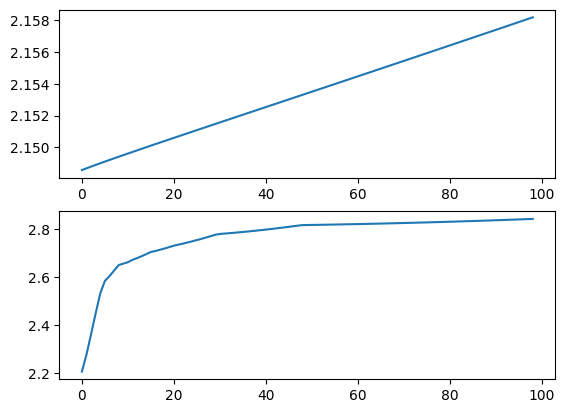

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

MSE_ridge = []
for j in range(1, 100):
  ridge = Ridge(alpha = j/10)  # You can adjust the regularization strength with the alpha parameter
  model_ridge = ridge.fit(X_train, Y_train)
  ridge_pred = ridge.predict(X_test)
  ridge_mse = mean_squared_error(Y_test, ridge_pred)
  MSE_ridge.append(ridge_mse)

import matplotlib.pyplot as plt

MSE_lasso = []
# Lasso Regression
for j in range(1, 100):
  lasso = Lasso(alpha=j/100)  # You can adjust the regularization strength with the alpha parameter
  model_lasso = lasso.fit(X_train, Y_train)
  lasso_pred = lasso.predict(X_test)
  lasso_mse = mean_squared_error(Y_test, lasso_pred)
  MSE_lasso.append(lasso_mse)

fig, axs = plt.subplots(2)
axs[0].plot(MSE_ridge)
axs[1].plot(MSE_lasso)

Clearly ridge regression does better. MSE is minimum for an alpha value close to 0.3

In [ ]:
ideal_alpha = np.argmin(MSE_ridge)/10
print(f"Ideal regularization parameter for ridge regression is {ideal_alpha}")

Ideal regularization parameter for ridge regression is 0.0


Ideal regularization parameter for ridge regression is 2.5


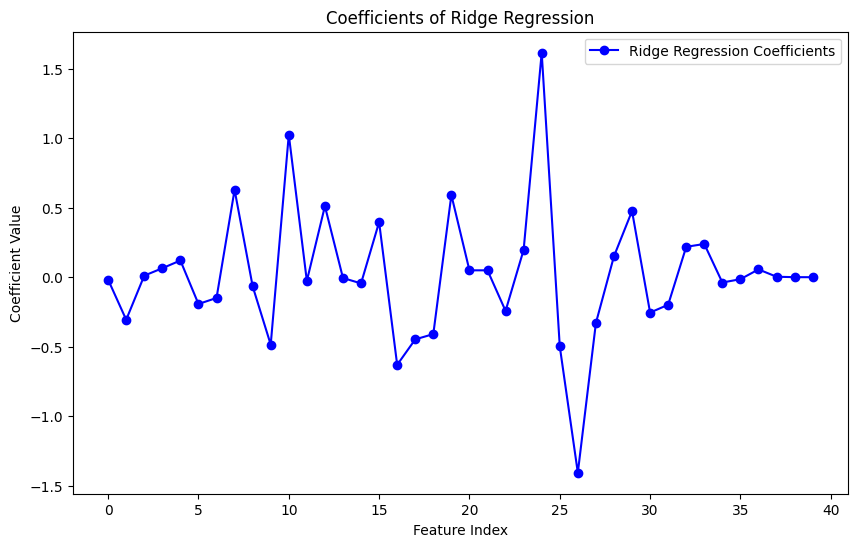

In [ ]:
ridge = Ridge(alpha = 2.5)  #ideal alpha value that minimizes the MSE
model_ridge = ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(Y_test, ridge_pred))
ridge_r2=r2_score(Y_test, ridge_pred)

plt.figure(figsize=(10, 6))
plt.plot(model_ridge.coef_, color='blue', linestyle='-', marker='o', label='Ridge Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Ridge Regression')
plt.legend()
plt.show()

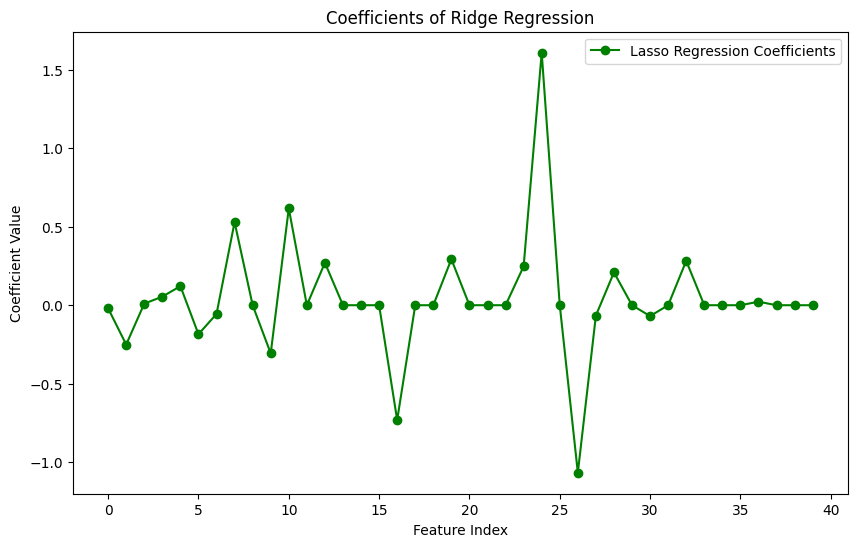

In [ ]:
lasso = Lasso(alpha = 0.01)  #ideal alpha value that minimizes the MSE
model_lasso = lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_pred))
lasso_r2=r2_score(Y_test, lasso_pred)

plt.figure(figsize=(10, 6))
plt.plot(model_lasso.coef_, color='green', linestyle='-', marker='o', label='Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Ridge Regression')
plt.legend()
plt.show()

In [ ]:
idxs_lasso = [j for j in range(len(model_lasso.coef_)) if model_lasso.coef_[j] == 0]


In [ ]:
idxs_ridge = [j for j in range(len(model_ridge.coef_)) if model_ridge.coef_[j] == 0]

In [ ]:
feature_names = X_train.columns

# Getting the names of unimportant features
unimportant_feature_names = [feature_names[idx] for idx in idxs_lasso]
print(f"There are {len(unimportant_feature_names)}/{len(feature_names)} unimportant features.")
print("They are: ", unimportant_feature_names)


There are 19/40 unimportant features.
They are:  ['b_efficiency', 'b_own_cost', 'brand_country_Hong Kong', 'brand_country_Italy', 'brand_country_Japan', 'brand_country_Sweden', 'brand_country_Switzerland', 'brand_country_United States', 'brand_continent_American', 'brand_continent_Asia', 'fuel_E85 Flex Fuel', 'fuel_Other', 'tsm_DCT', 'tsm_Other', 'exterior_color_Black', 'exterior_color_Other', 'interior_color_Black', 'interior_color_Other', 'interior_color_White']


If these features are removed from the model, then it will be able to generalize well on unseen data.

In [ ]:
#Evaluation metrics on test data
print(f'RMSE of ridge regression {ridge_rmse}''\t' )
print(f'R2 of ridge regression {ridge_r2}''\n' )
print(f'RMSE of lasso regression {lasso_rmse}''\t' )
print(f'R2 of lasso regression {lasso_r2}''\t' )

RMSE of ridge regression 1.4666246845755395	
R2 of ridge regression 0.7915014781581399

RMSE of lasso regression 1.4857149924987807	
R2 of lasso regression 0.786038313924178	


#Principal Componenet Regression

Principal component regression is not good when there are a lot of categorical variables, however we are performing for the purpose of experimentation.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
train_pca=pca.fit(X_train)


In [ ]:
pca.explained_variance_ratio_

array([7.72223729e-01, 2.25683596e-01, 1.26944934e-03, 4.78120567e-04,
       8.93085958e-05])

We can observe that first 2 principal components are explaining 99% variance present in the data, so instead of taking first 5 components, we will proceed with only 2 components.

In [ ]:
pca=PCA(n_components=2)
pca.fit(X_train)
train_pca=pca.transform(X_train)
train_pca.shape

(3147, 2)

In [ ]:
X_train_pca=pd.DataFrame(train_pca,columns=['PC1','PC2'],index=X_train.index)

In [ ]:
X_train_pca.head()

PC1         PC2
3681  -55.773519  -28.224536
2995 -113.526478  111.615529
3323  203.646064   95.516325
165   -30.251519 -109.001512
3574  -71.687474 -169.197048

In [ ]:
model_pcr = OLS(Y_train,X_train_pca).fit()
model_pcr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              22.85
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                    1.41e-10
Time:                        16:28:48   Log-Likelihood:                         -14344.
No. Observations:                3147   AIC:                                  2.869e+04
Df Residuals:                    3145   BIC:                                  2.871e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.0197      0.004      5.569      0.000       0.013       0.027
PC2            0.0250      0.007      3.831      0.000       0.012       0.038
==============================================================================
Omnibus:                       45.270   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.028
Skew:                           0.022   Prob(JB):                     9.35e-19
Kurtosis:                       3.794   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, even though 2 pricipal components were explaining, 99% of variablity in the data, the R2 and adjusted R2 values are very less. It reinforces our understanding that Principal component regression is not a good model in presence of lot of categorical variables. We are not evaluating the metrics on test data as this model is not performing good on the train data.

#Error Analysis and outlier removal through Jack knife method

From the results of different models, we can observe that the mlr aterbackward elimination model is the simplest model as it's using least number of parameters also the results are almost comparable to other mmodels, so we will do the error analysis for this model to verify the nature of errors. We could have considered the regularized model as well but there are not not standard functions defined for the analysis of those methods., so for the sake of conveinience, we are moving ahead with the MLR model after backward elimination method.

In [ ]:
# Jack knife

n = len(Y_train)
coefficients = []

for i in range(n):

    X_train_jack = X_train_b_e.drop(X_train_b_e.index[i])
    Y_train_jack = Y_train.drop(Y_train.index[i])
    model_jack = OLS(Y_train_jack, X_train_jack).fit()
    coefficients.append(model_jack.params)

coefficients_df = pd.DataFrame(coefficients)

In [ ]:
# mean And standard error of the coefficients across all the jackknife samples

mean_coefficients = coefficients_df.mean()
std_error_coefficients = coefficients_df.std()

print("Mean Coefficients:\n", mean_coefficients)
print("Standard Error of Coefficients:\n", std_error_coefficients)

Mean Coefficients:
 milage                         -0.016099
accident                       -0.387560
horsepower                      0.011198
cylinders                       0.076335
car_age                        -0.202267
b_Maintenance                   1.113663
b_luxury                       -2.497839
b_comfort                       4.394371
brand_country_Germany          -0.243041
brand_country_Hong Kong         2.552628
brand_country_Japan             0.878725
brand_country_United Kingdom    1.529420
brand_continent_Asia           -1.003523
fuel_Diesel                     2.028150
fuel_Electric                  -1.076828
fuel_Hybrid                     0.566114
fuel_Other                      1.032354
dtype: float64
Standard Error of Coefficients:
 milage                          0.000012
accident                        0.001197
horsepower                      0.000010
cylinders                       0.000608
car_age                         0.000161
b_Maintenance                 

In [ ]:
# Outliers detection using cooks distance, standard residual and student residual

from statsmodels.stats.outliers_influence import OLSInfluence

mlr_model_b_e = OLS(Y_train, X_train_b_e).fit()


influence = OLSInfluence(mlr_model_b_e)
summ_df = influence.summary_frame()

cooksd = summ_df['cooks_d']
standard_resid = summ_df['standard_resid']
student_resid = summ_df['student_resid']

cooksd_threshold = 10 / len(Y_train)  # F-distribution threshold for Cook's distance
std_resid_threshold = 4  # Threshold for standardized residuals
student_resid_threshold = 4  # Threshold for studentized residuals

outliers_cooks = cooksd > cooksd_threshold
outliers_std_resid = abs(standard_resid) > std_resid_threshold
outliers_student_resid = abs(student_resid) > student_resid_threshold

outliers = outliers_cooks | outliers_std_resid | outliers_student_resid

# Print out indices of outliers
print("Indices of Outliers:")
print(outliers[outliers].index)


Indices of Outliers:
Index([3363, 2118, 1556,  908, 3162, 3134, 1538, 2906, 2894, 2926, 3849, 1542,
       3642, 1445, 2897, 1537, 2516, 3216, 2975, 1684, 3805, 1988, 1859, 3759,
       3013, 2371, 3083, 3548, 2891, 1863, 2419, 2889, 2902, 3189, 2901,  163,
       2886, 2892, 2900, 3858,  271, 3859, 2919, 2950, 3898, 3861, 3857, 3644,
        925, 1478,  890, 1048, 1836, 3554, 3856, 1924, 1936, 2530, 2584, 1551,
        498, 2923, 2887, 1839, 2970, 3772, 1090, 1467, 3262, 3215,  923, 2189],
      dtype='int64')


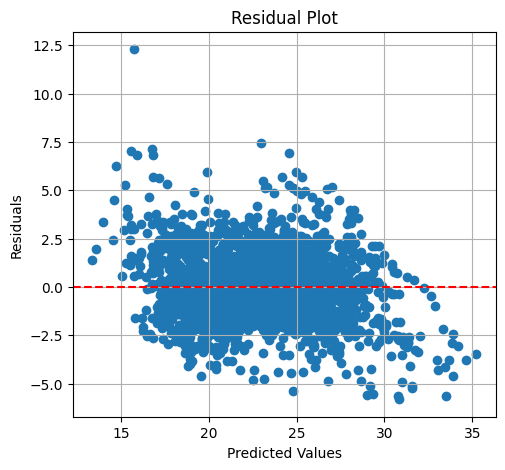

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

mlr_model_b_e = OLS(Y_train, X_train_b_e).fit()

predictions = mlr_model_b_e.fittedvalues
residuals = mlr_model_b_e.resid

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)

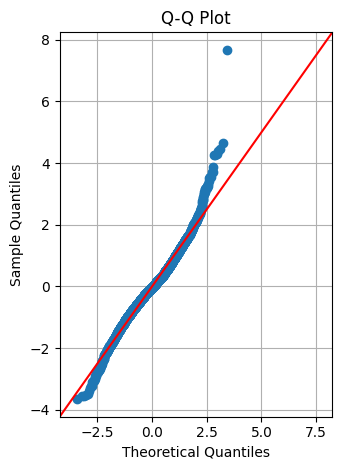

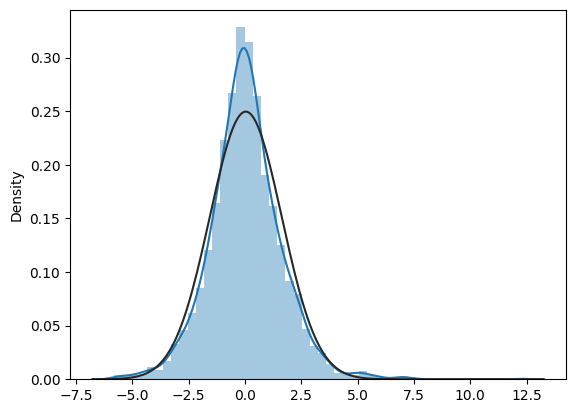

In [ ]:
# error normality check
ax = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True, dist=stats.norm, ax=ax)
plt.title("Q-Q Plot")
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

#histogram of error
from scipy import stats
sns.distplot(mlr_model_b_e.resid, fit=stats.norm);

The curves drown above indicate that the errors are normally distributed, so we will proceed with the final predictions.

#Final Predictions on test data

In [ ]:
from scipy.special import boxcox, inv_boxcox
inverse_y_predicted = inv_boxcox(Y_mlr_b_e_pred, lambda_values['price']) - 1
inverse_y_actual = inv_boxcox(Y_test, lambda_values['price']) - 1

comparison_data=pd.concat([inverse_y_actual,inverse_y_predicted],axis=1)

In [ ]:
comparison_data.head()

price              0
2831    6500.0    6316.198833
1569   33000.0   31821.978957
3705   44000.0   42770.650298
731    25000.0   24568.237037
3194  151900.0  141828.606153

In [ ]:
comparison_data.rename({'price':'Actual_price',0:'Predicted_price'},axis=1,inplace=True)

In [ ]:
comparison_data.head()

Actual_price  Predicted_price
2831        6500.0      6316.198833
1569       33000.0     31821.978957
3705       44000.0     42770.650298
731        25000.0     24568.237037
3194      151900.0    141828.606153